In [1]:
#all imports here
import numpy as np 
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
])


In [4]:
# Load FashionMNIST Dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 267kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.05MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.5MB/s]


In [5]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

model = CNNModel().to(device)

In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Validation loop
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total
    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

  


Epoch [1/20], Step [0/1875], Loss: 2.3172
Epoch [1/20], Step [1000/1875], Loss: 0.4289
Validation Loss: 0.3785, Validation Accuracy: 0.8607
Epoch [2/20], Step [0/1875], Loss: 0.2501
Epoch [2/20], Step [1000/1875], Loss: 0.5532
Validation Loss: 0.3185, Validation Accuracy: 0.8849
Epoch [3/20], Step [0/1875], Loss: 0.1173
Epoch [3/20], Step [1000/1875], Loss: 0.1468
Validation Loss: 0.2807, Validation Accuracy: 0.8984
Epoch [4/20], Step [0/1875], Loss: 0.1351
Epoch [4/20], Step [1000/1875], Loss: 0.1534
Validation Loss: 0.2704, Validation Accuracy: 0.9019
Epoch [5/20], Step [0/1875], Loss: 0.0664
Epoch [5/20], Step [1000/1875], Loss: 0.2222
Validation Loss: 0.2794, Validation Accuracy: 0.8928
Epoch [6/20], Step [0/1875], Loss: 0.2229
Epoch [6/20], Step [1000/1875], Loss: 0.2246
Validation Loss: 0.2544, Validation Accuracy: 0.9066
Epoch [7/20], Step [0/1875], Loss: 0.0567
Epoch [7/20], Step [1000/1875], Loss: 0.3196
Validation Loss: 0.2547, Validation Accuracy: 0.9115
Epoch [8/20], Step [

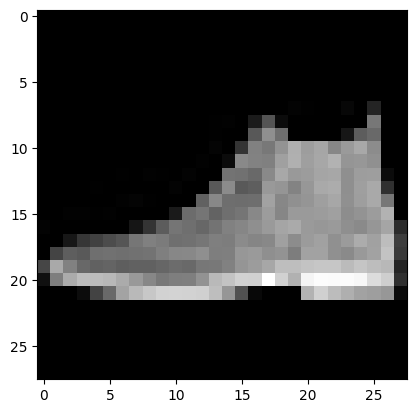

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


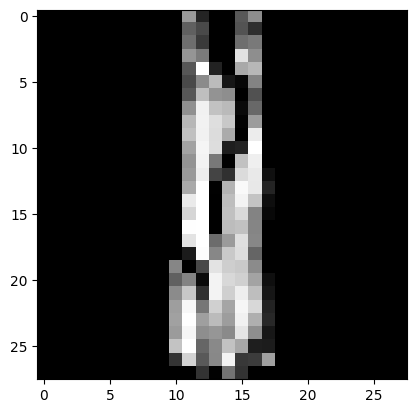

predicted_class:  ['Dress']
target_class:  ['Dress']


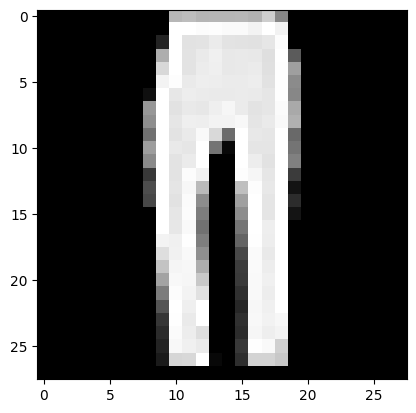

predicted_class:  ['Trouser']
target_class:  ['Trouser']


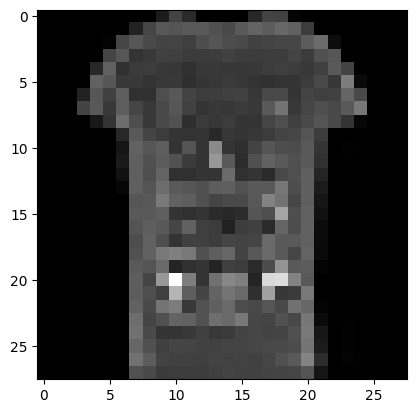

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


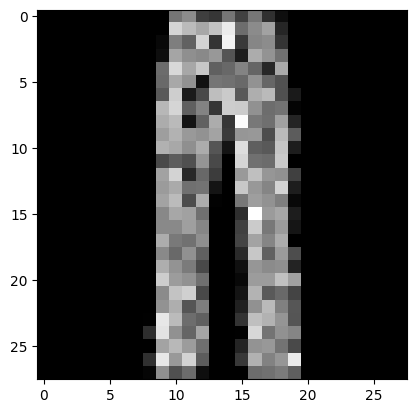

predicted_class:  ['Trouser']
target_class:  ['Trouser']


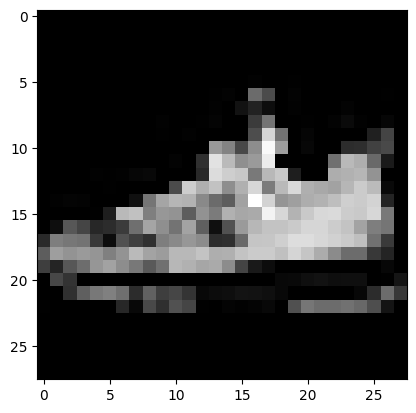

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


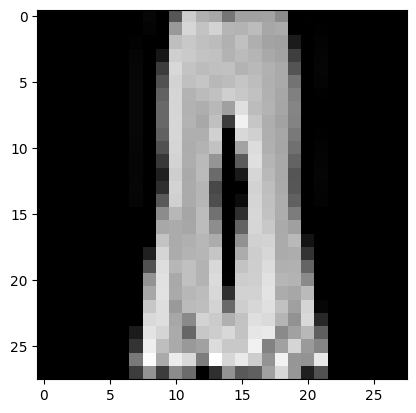

predicted_class:  ['T-shirt/top']
target_class:  ['Trouser']


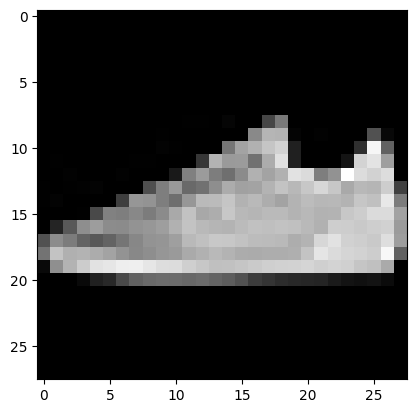

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


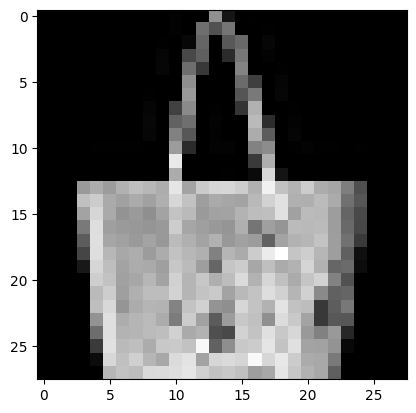

predicted_class:  ['Bag']
target_class:  ['Bag']


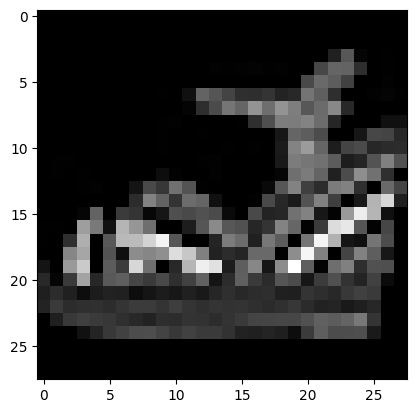

predicted_class:  ['Sandal']
target_class:  ['Sandal']


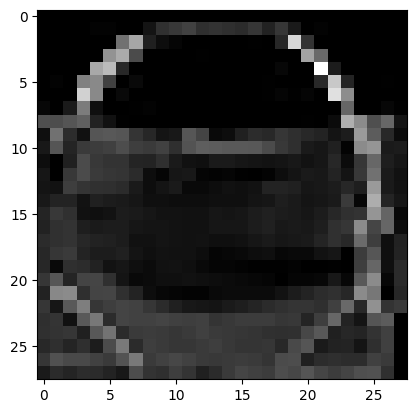

predicted_class:  ['Bag']
target_class:  ['Bag']


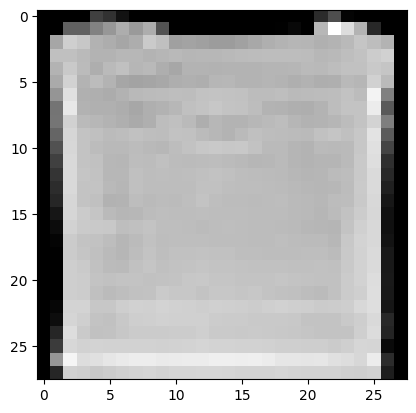

predicted_class:  ['Bag']
target_class:  ['Bag']


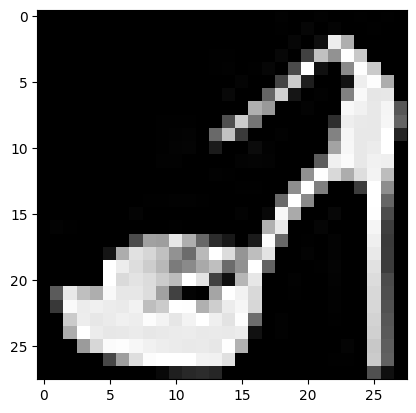

predicted_class:  ['Sandal']
target_class:  ['Sandal']


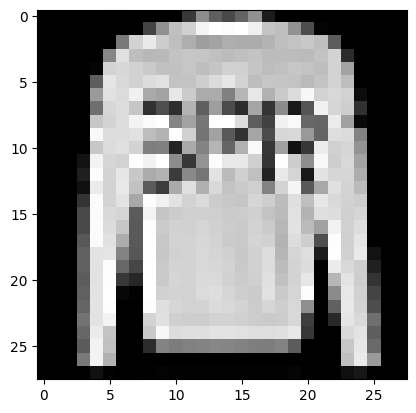

predicted_class:  ['Pullover']
target_class:  ['Pullover']


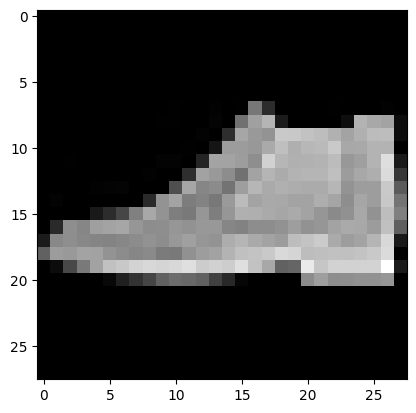

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


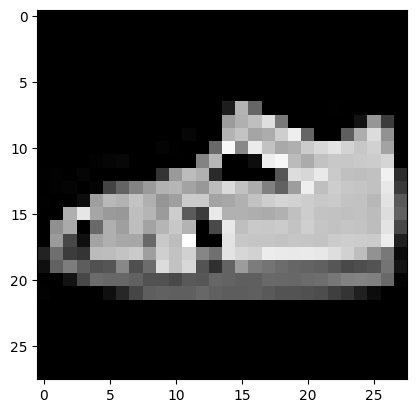

predicted_class:  ['Sandal']
target_class:  ['Sandal']


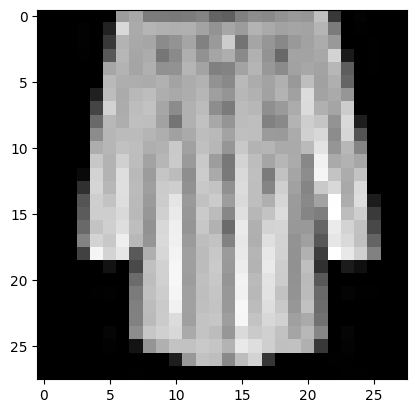

predicted_class:  ['Shirt']
target_class:  ['Shirt']


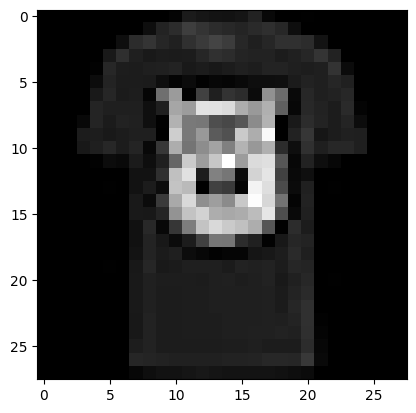

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


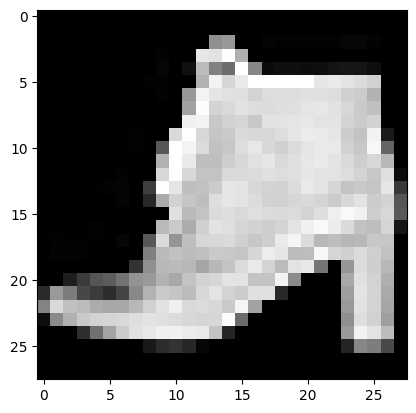

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


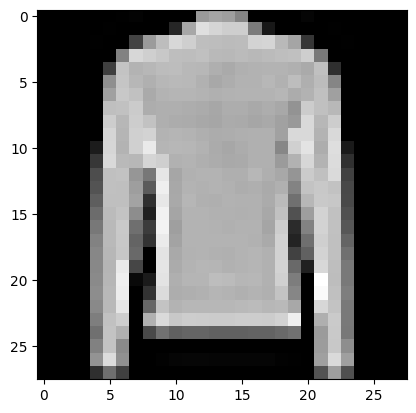

predicted_class:  ['Pullover']
target_class:  ['Pullover']


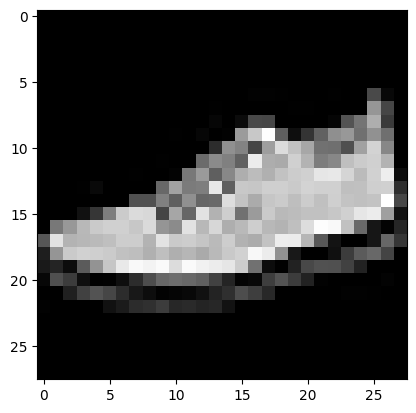

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


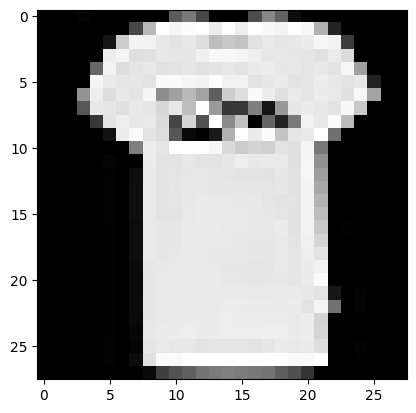

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


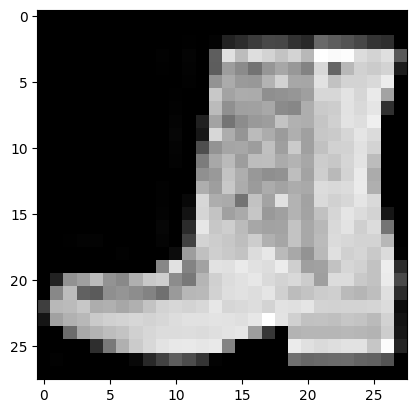

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


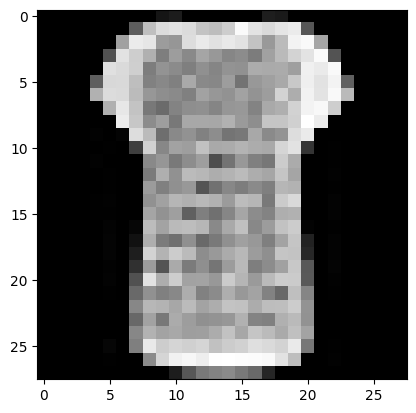

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


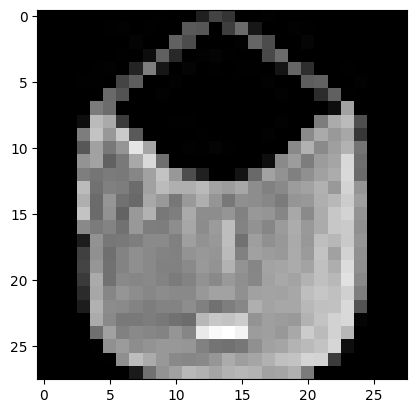

predicted_class:  ['Bag']
target_class:  ['Bag']


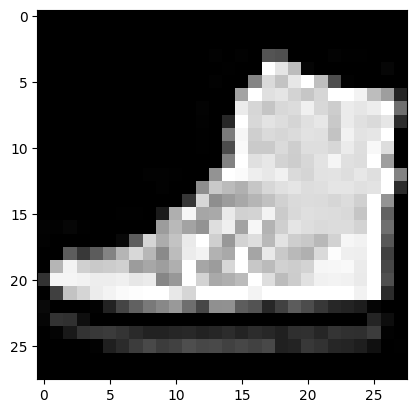

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


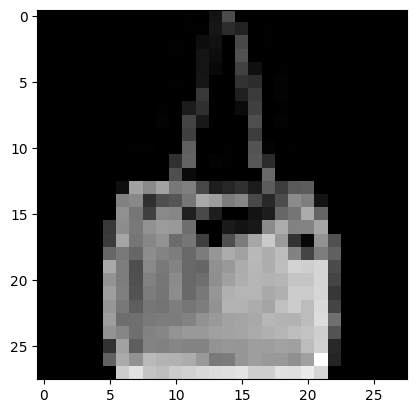

predicted_class:  ['Bag']
target_class:  ['Bag']


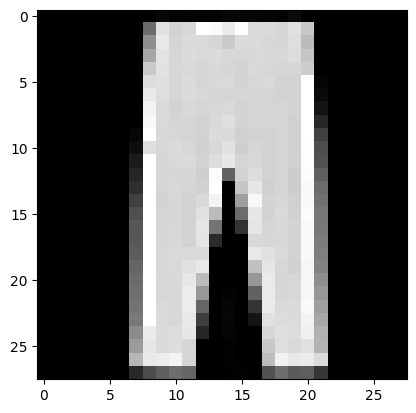

predicted_class:  ['Trouser']
target_class:  ['Trouser']


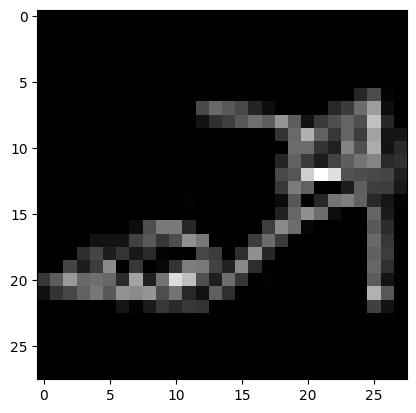

predicted_class:  ['Sandal']
target_class:  ['Sandal']


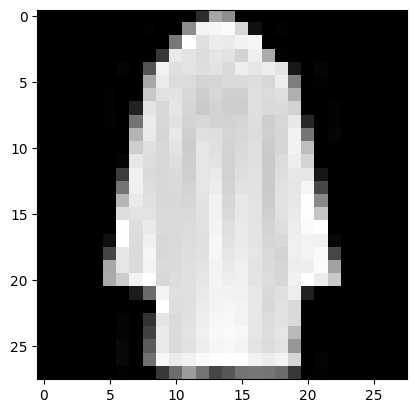

predicted_class:  ['Coat']
target_class:  ['Coat']


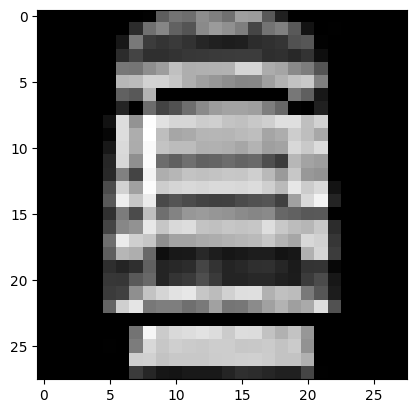

predicted_class:  ['Pullover']
target_class:  ['Dress']


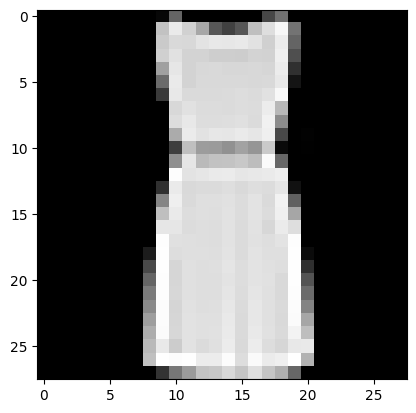

predicted_class:  ['Dress']
target_class:  ['Dress']


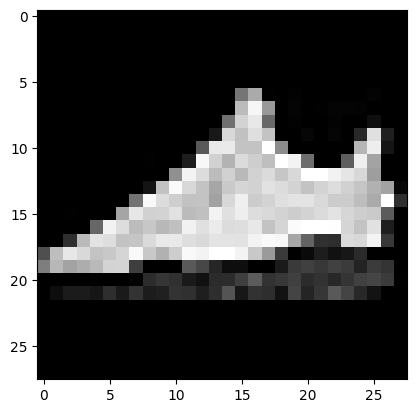

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


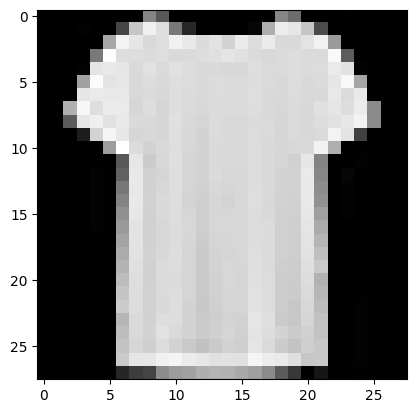

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


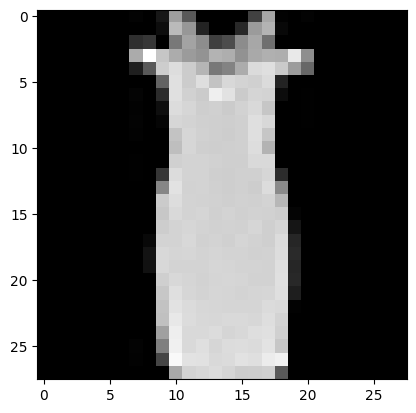

predicted_class:  ['Dress']
target_class:  ['Dress']


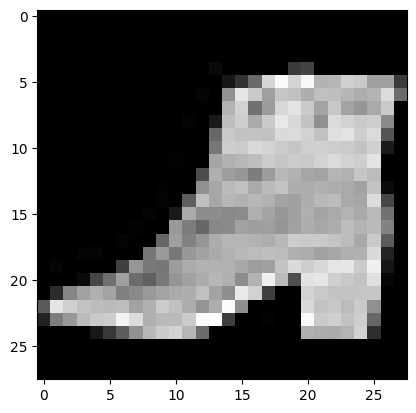

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


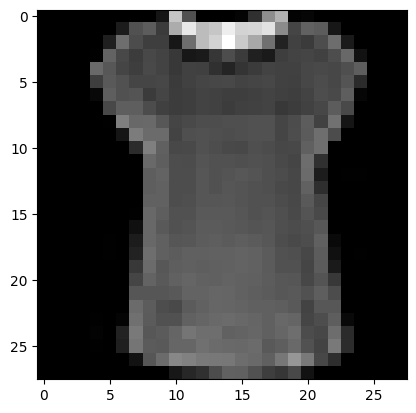

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


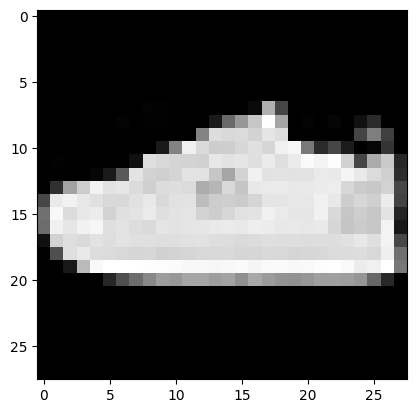

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


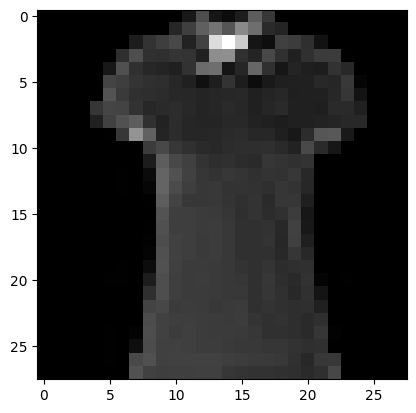

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


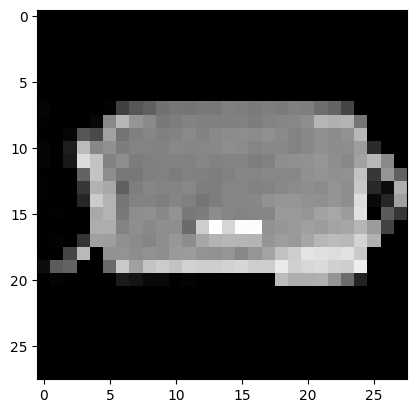

predicted_class:  ['Bag']
target_class:  ['Bag']


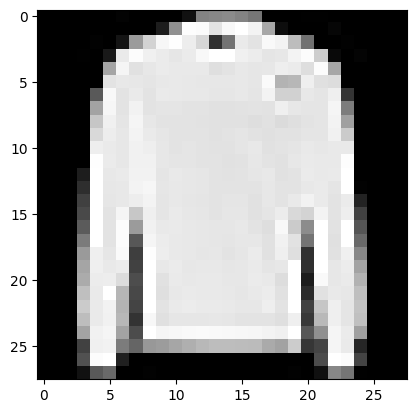

predicted_class:  ['Pullover']
target_class:  ['Pullover']


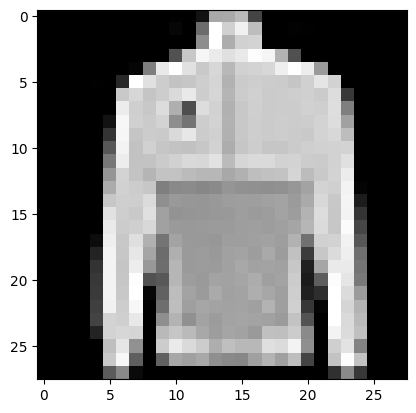

predicted_class:  ['Coat']
target_class:  ['Coat']


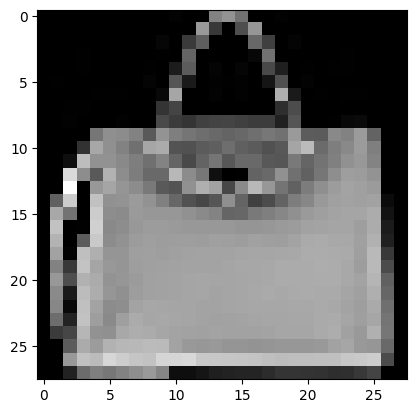

predicted_class:  ['Bag']
target_class:  ['Bag']


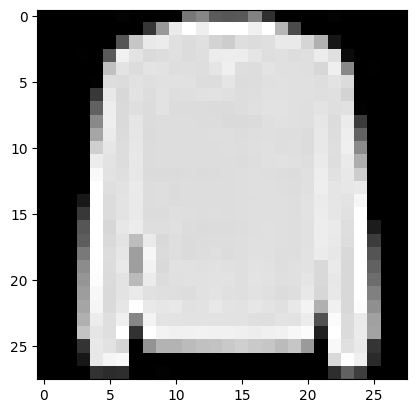

predicted_class:  ['Coat']
target_class:  ['Pullover']


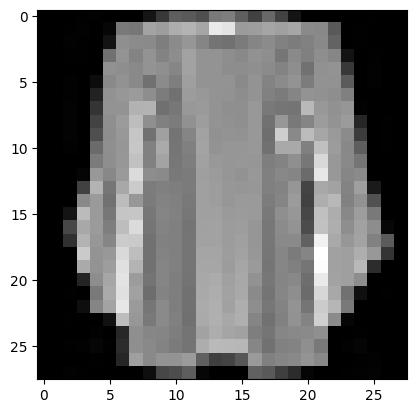

predicted_class:  ['Shirt']
target_class:  ['Coat']


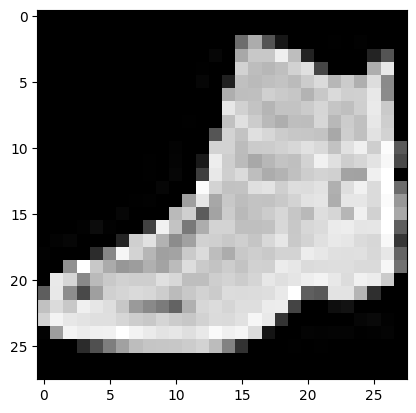

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


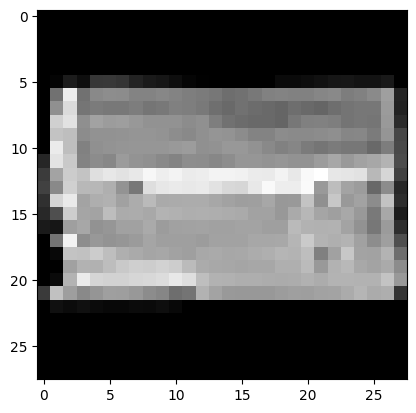

predicted_class:  ['Bag']
target_class:  ['Bag']


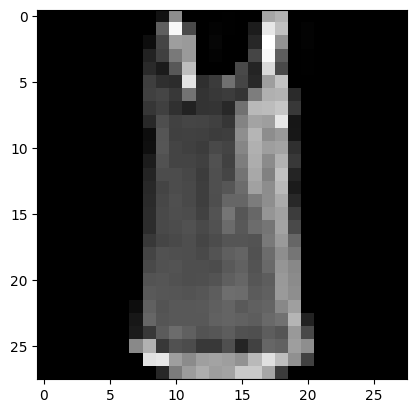

predicted_class:  ['Trouser']
target_class:  ['T-shirt/top']


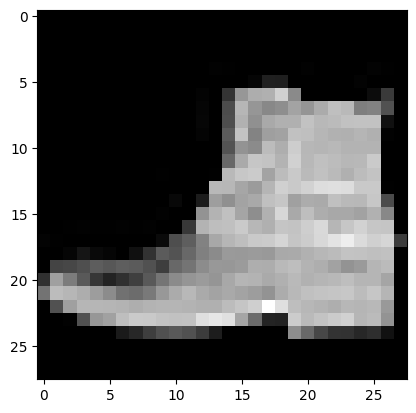

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


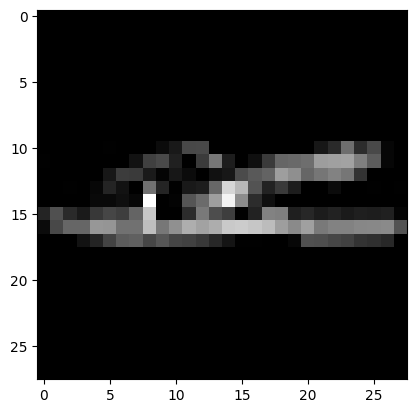

predicted_class:  ['Sandal']
target_class:  ['Sandal']


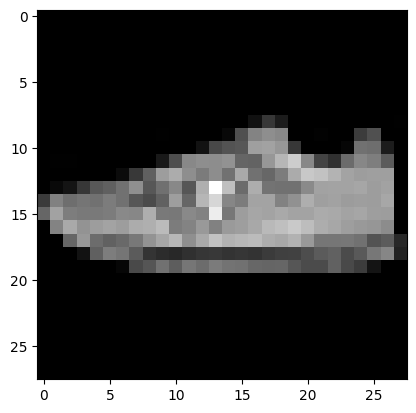

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


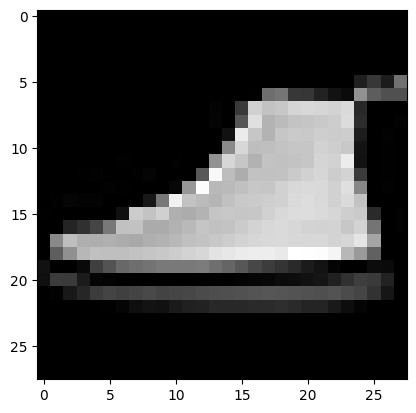

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


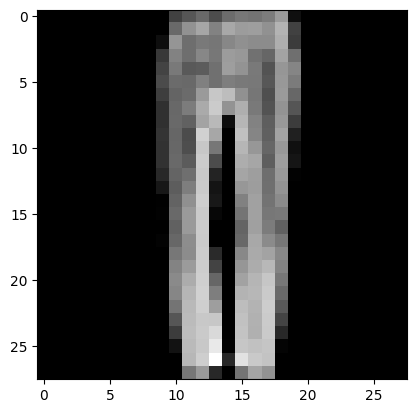

predicted_class:  ['Trouser']
target_class:  ['Trouser']


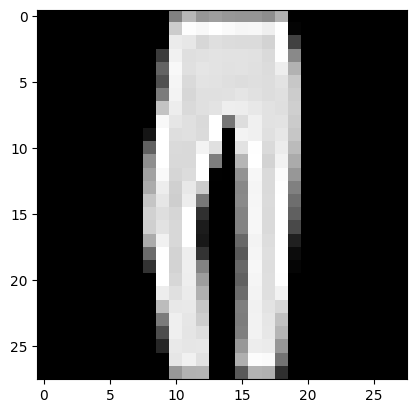

predicted_class:  ['Trouser']
target_class:  ['Trouser']


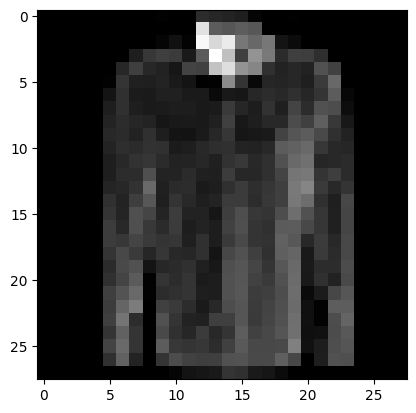

predicted_class:  ['Shirt']
target_class:  ['Shirt']


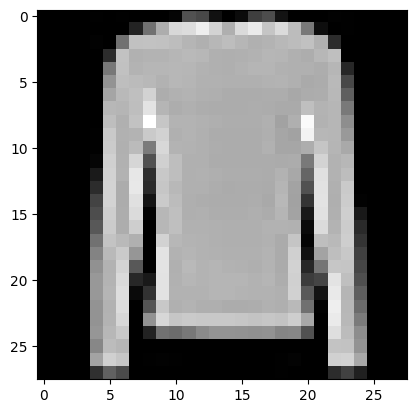

predicted_class:  ['Pullover']
target_class:  ['Pullover']


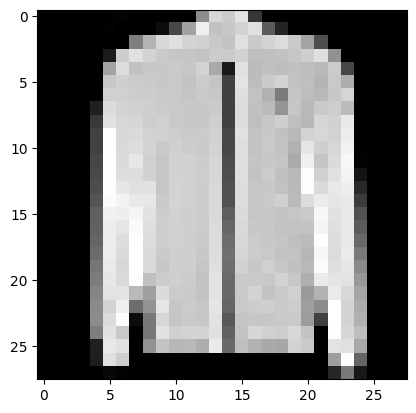

predicted_class:  ['Coat']
target_class:  ['Coat']


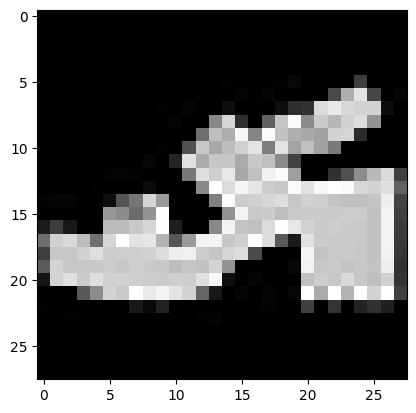

predicted_class:  ['Sandal']
target_class:  ['Sandal']


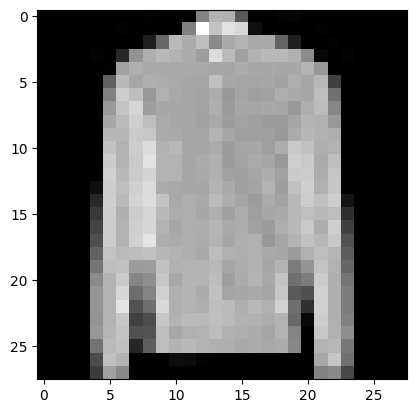

predicted_class:  ['Shirt']
target_class:  ['Coat']


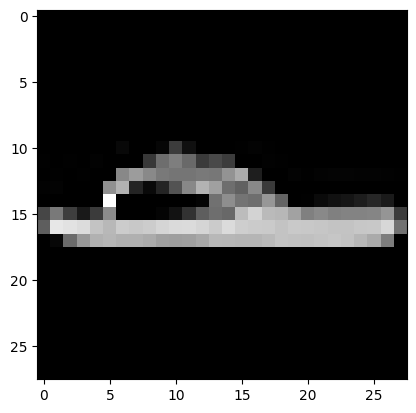

predicted_class:  ['Sandal']
target_class:  ['Sandal']


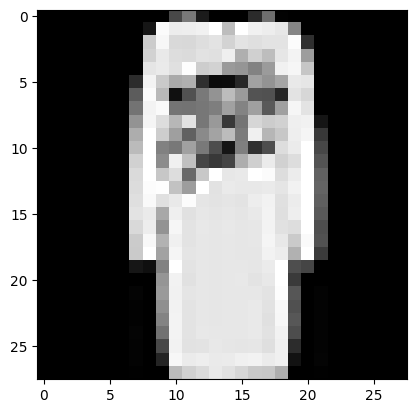

predicted_class:  ['Dress']
target_class:  ['Dress']


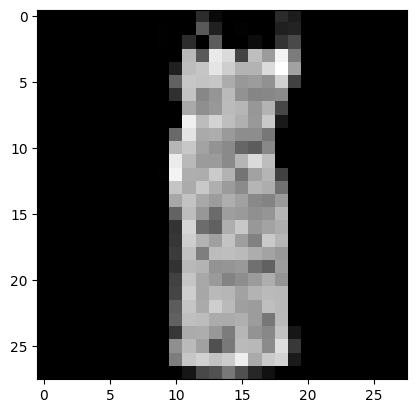

predicted_class:  ['Dress']
target_class:  ['Dress']


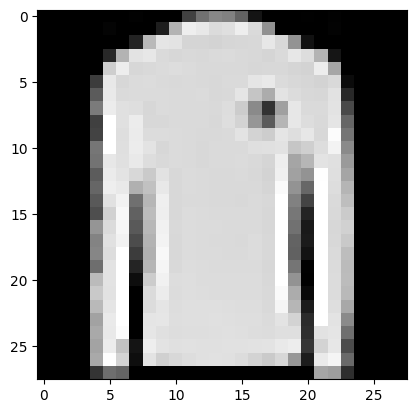

predicted_class:  ['Pullover']
target_class:  ['Pullover']


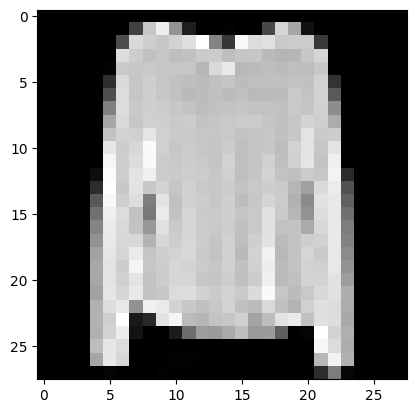

predicted_class:  ['Shirt']
target_class:  ['Shirt']


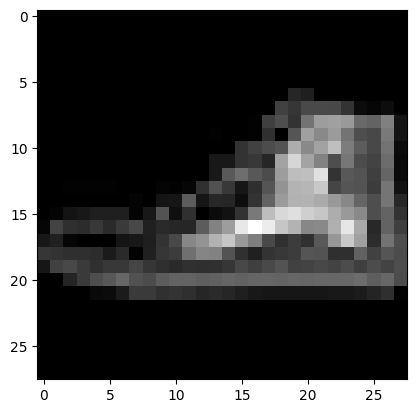

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


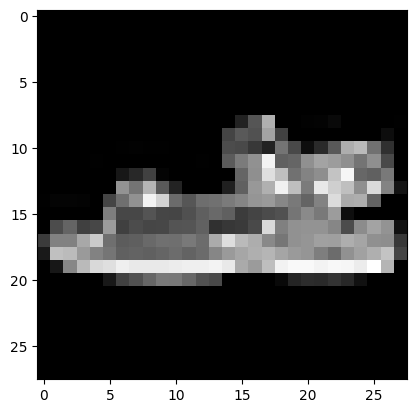

predicted_class:  ['Sandal']
target_class:  ['Sandal']


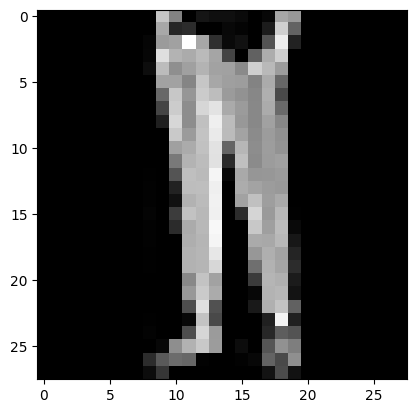

predicted_class:  ['Trouser']
target_class:  ['Trouser']


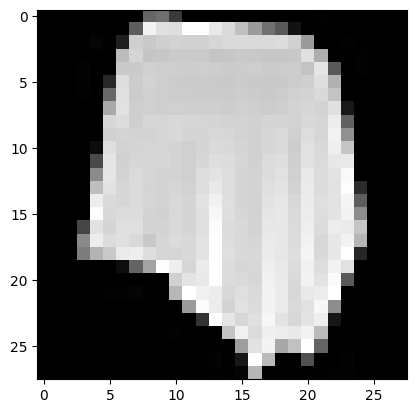

predicted_class:  ['Coat']
target_class:  ['Coat']


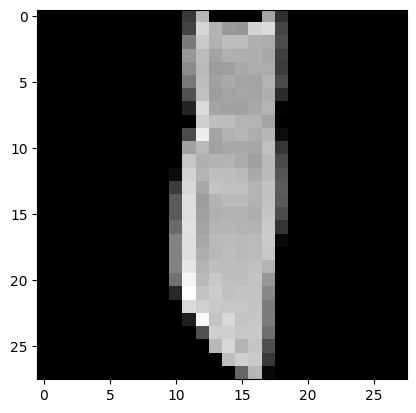

predicted_class:  ['Dress']
target_class:  ['Dress']


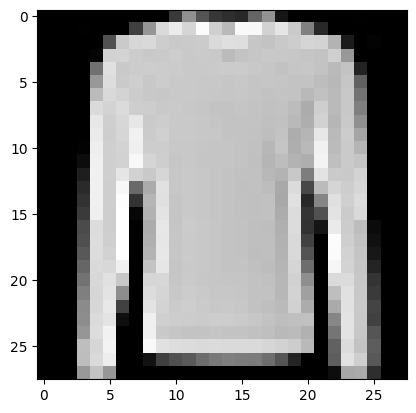

predicted_class:  ['Pullover']
target_class:  ['Pullover']


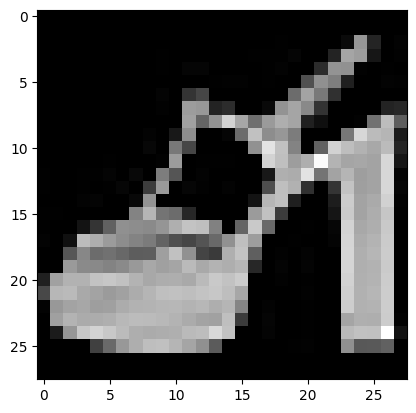

predicted_class:  ['Sandal']
target_class:  ['Sandal']


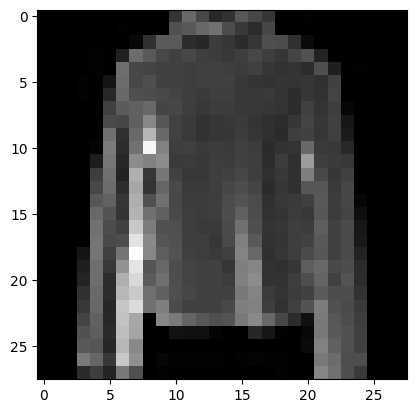

predicted_class:  ['Coat']
target_class:  ['Pullover']


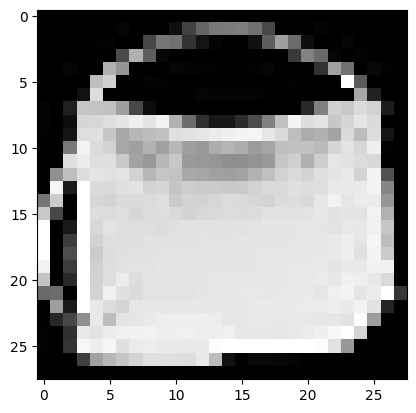

predicted_class:  ['Bag']
target_class:  ['Bag']


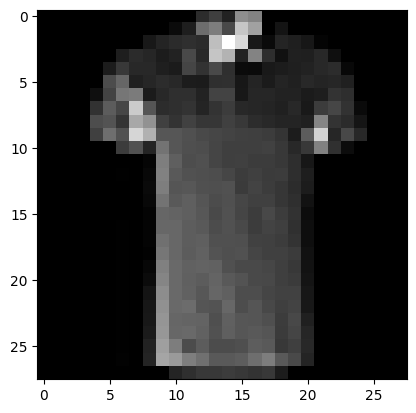

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


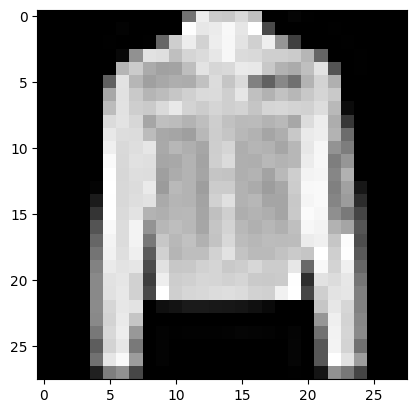

predicted_class:  ['Coat']
target_class:  ['Coat']


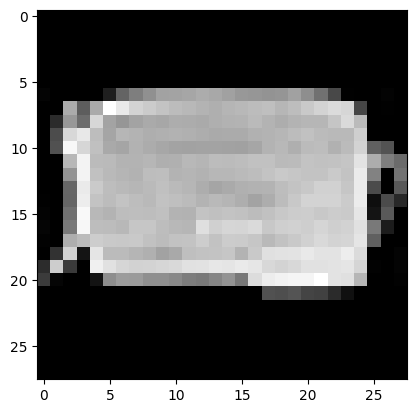

predicted_class:  ['Bag']
target_class:  ['Bag']


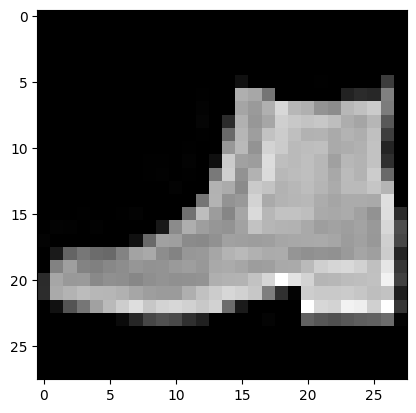

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


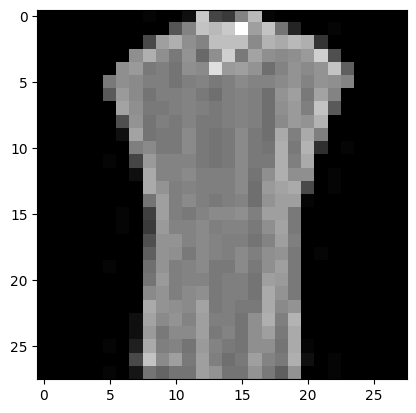

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


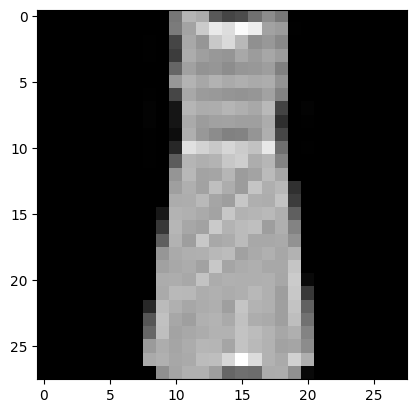

predicted_class:  ['Dress']
target_class:  ['Dress']


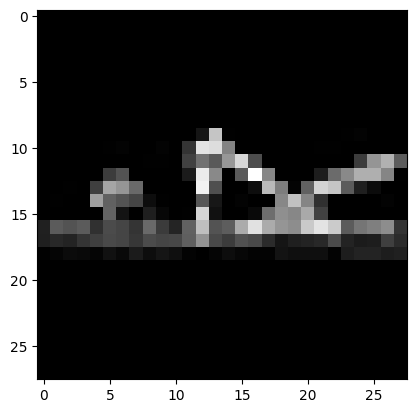

predicted_class:  ['Sandal']
target_class:  ['Sandal']


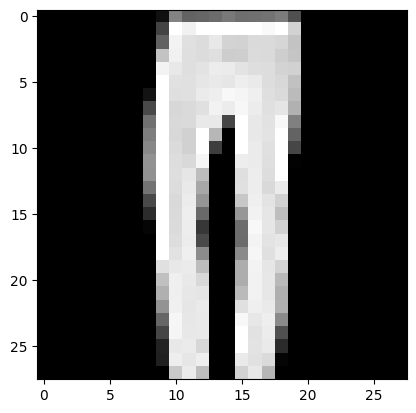

predicted_class:  ['Trouser']
target_class:  ['Trouser']


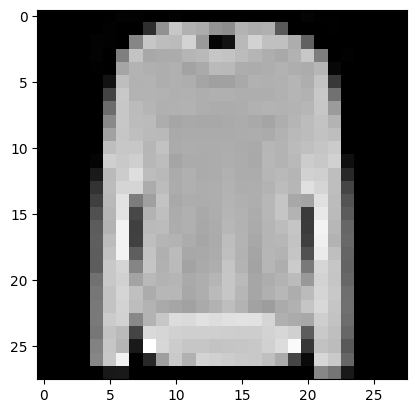

predicted_class:  ['Pullover']
target_class:  ['Pullover']


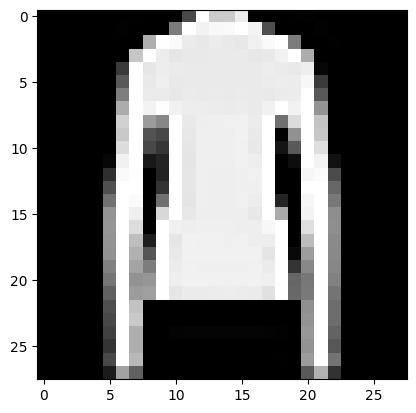

predicted_class:  ['Pullover']
target_class:  ['Pullover']


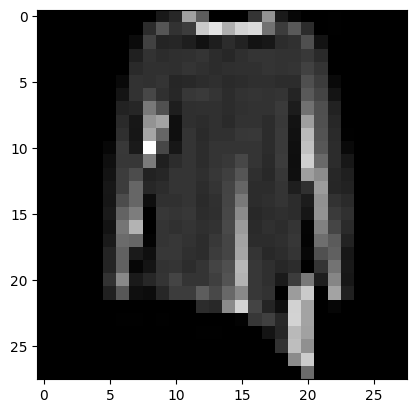

predicted_class:  ['Pullover']
target_class:  ['Pullover']


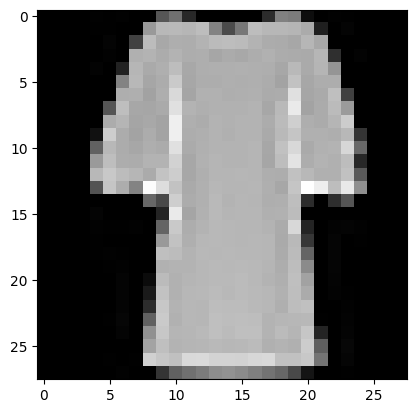

predicted_class:  ['Dress']
target_class:  ['Dress']


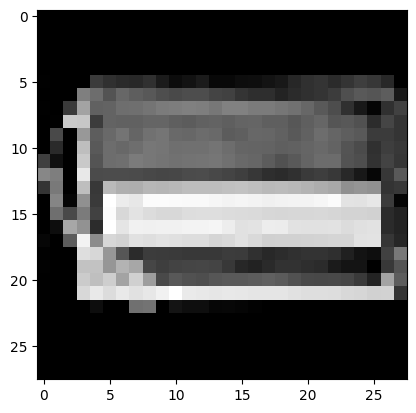

predicted_class:  ['Bag']
target_class:  ['Bag']


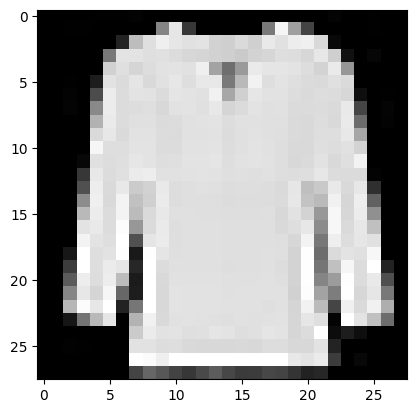

predicted_class:  ['Shirt']
target_class:  ['Shirt']


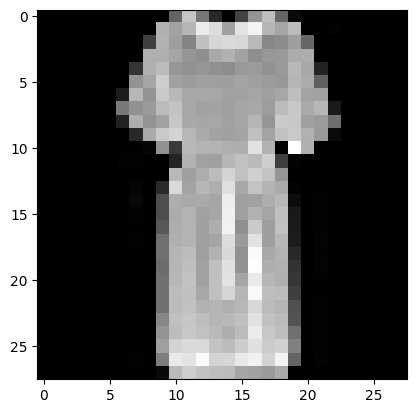

predicted_class:  ['Dress']
target_class:  ['Dress']


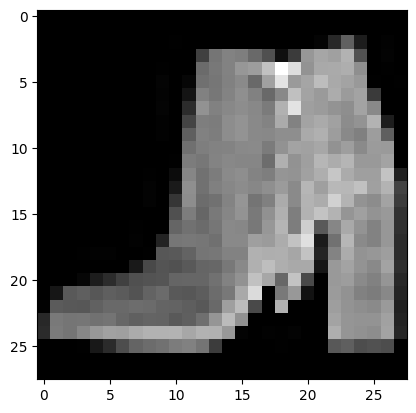

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


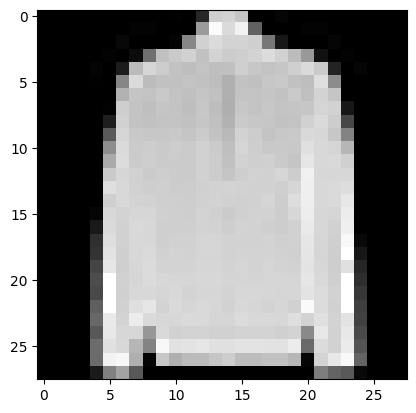

predicted_class:  ['Coat']
target_class:  ['Coat']


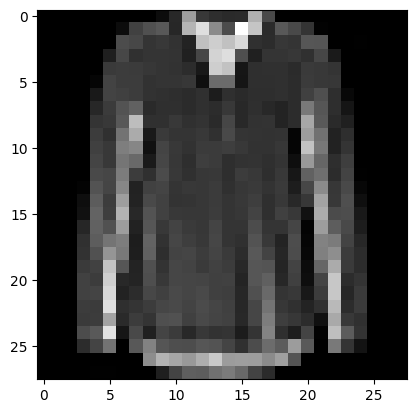

predicted_class:  ['Shirt']
target_class:  ['Shirt']


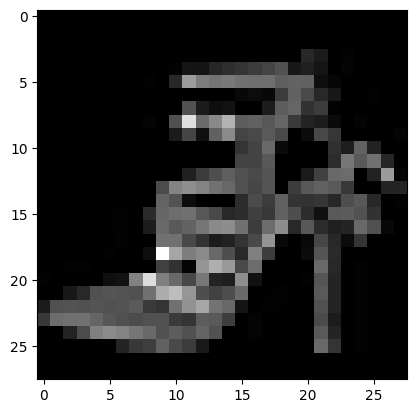

predicted_class:  ['Sandal']
target_class:  ['Sandal']


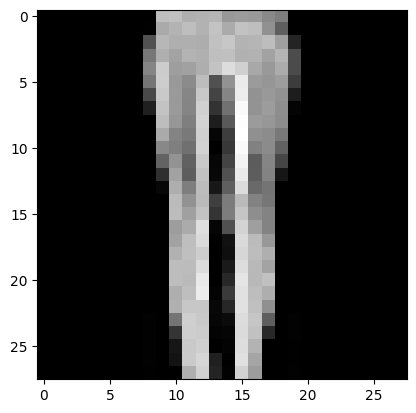

predicted_class:  ['Trouser']
target_class:  ['Trouser']


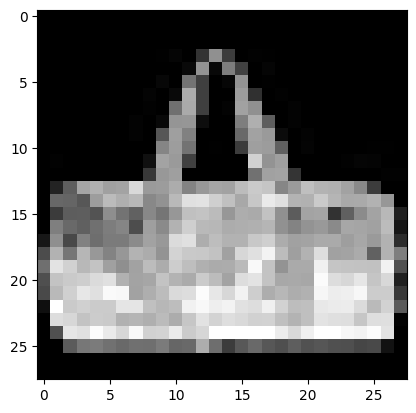

predicted_class:  ['Bag']
target_class:  ['Bag']


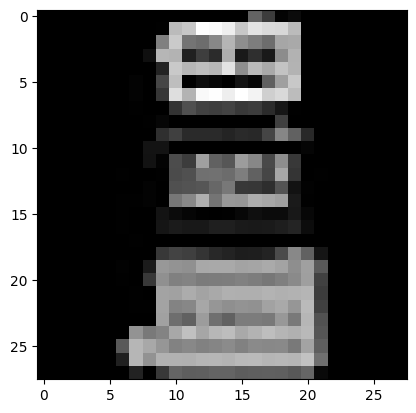

predicted_class:  ['T-shirt/top']
target_class:  ['Bag']


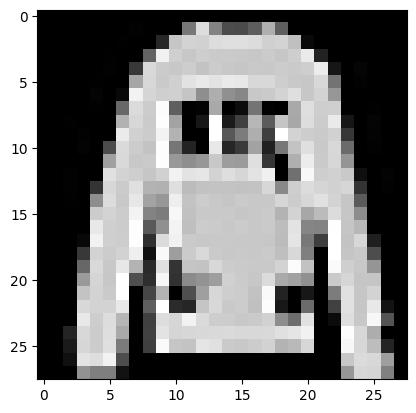

predicted_class:  ['Pullover']
target_class:  ['Pullover']


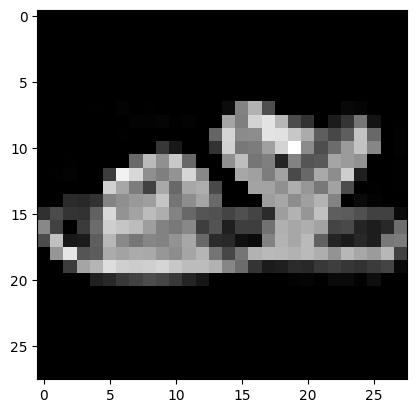

predicted_class:  ['Sandal']
target_class:  ['Sandal']


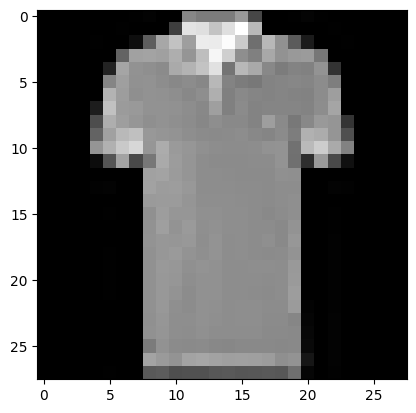

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


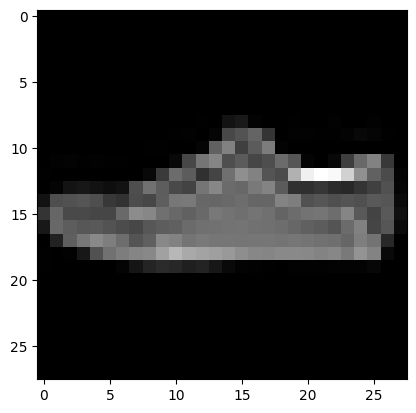

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


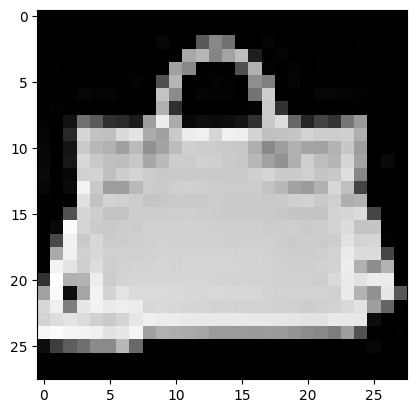

predicted_class:  ['Bag']
target_class:  ['Bag']


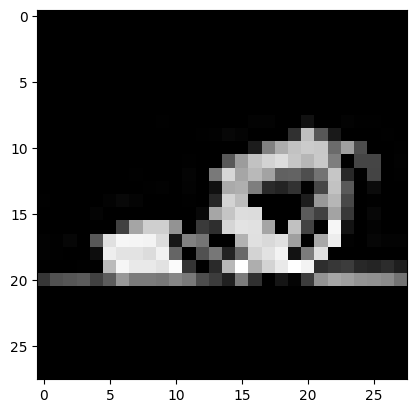

predicted_class:  ['Sandal']
target_class:  ['Sandal']


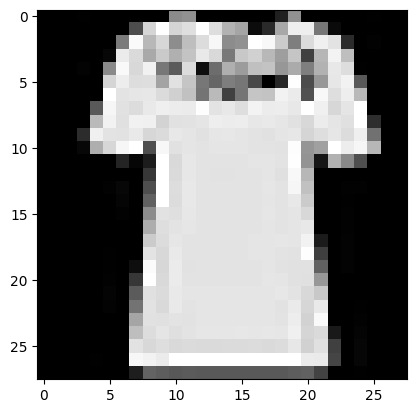

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


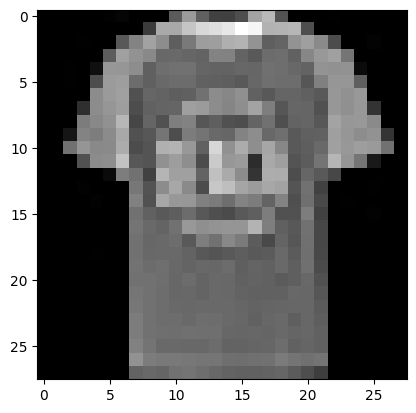

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


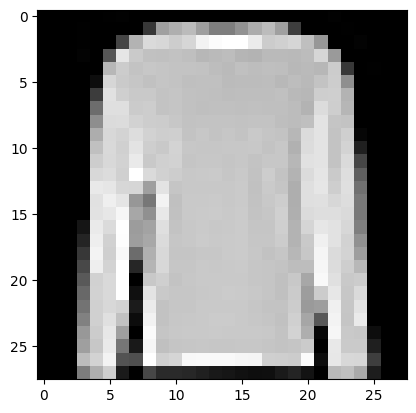

predicted_class:  ['Pullover']
target_class:  ['Pullover']


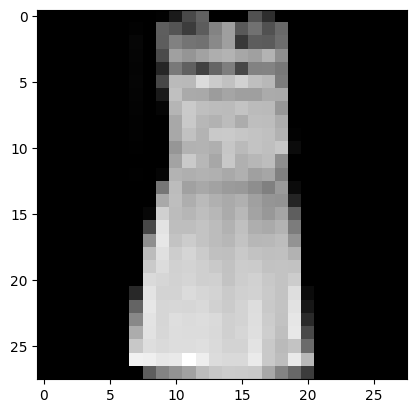

predicted_class:  ['Dress']
target_class:  ['Dress']


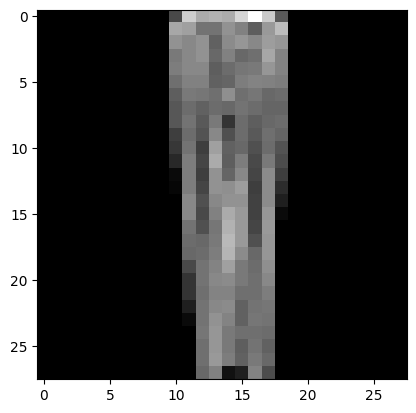

predicted_class:  ['Trouser']
target_class:  ['Trouser']


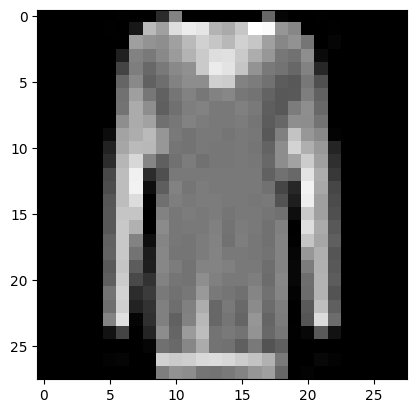

predicted_class:  ['Pullover']
target_class:  ['Pullover']


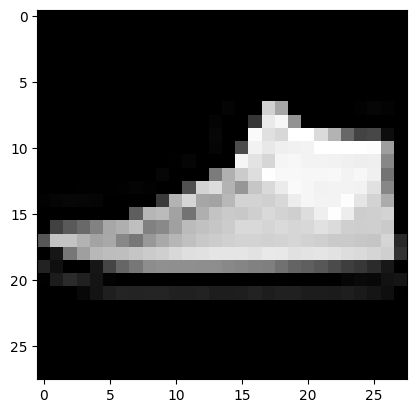

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


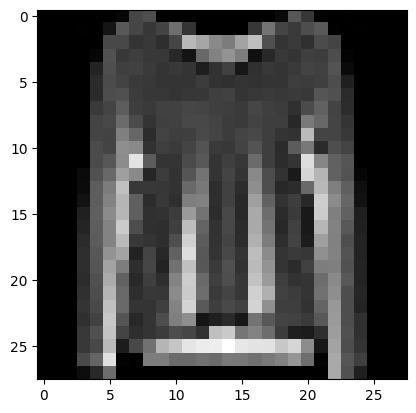

predicted_class:  ['Pullover']
target_class:  ['Pullover']


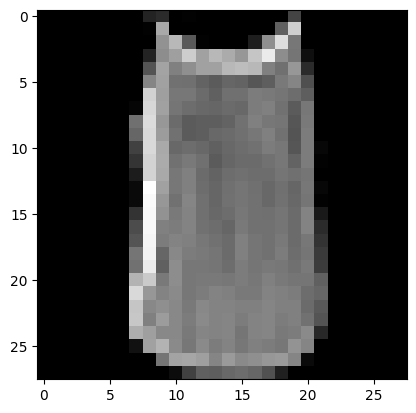

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


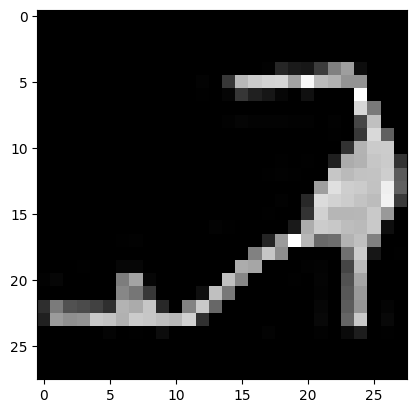

predicted_class:  ['Sandal']
target_class:  ['Sandal']


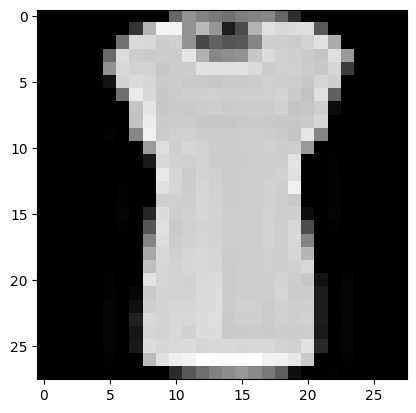

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


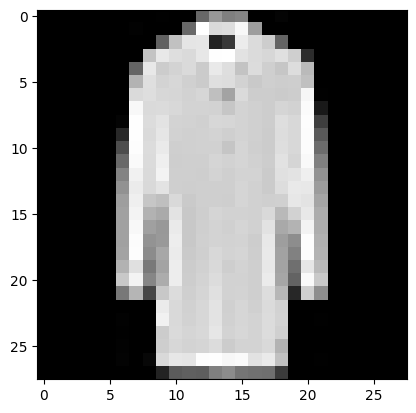

predicted_class:  ['Dress']
target_class:  ['Coat']


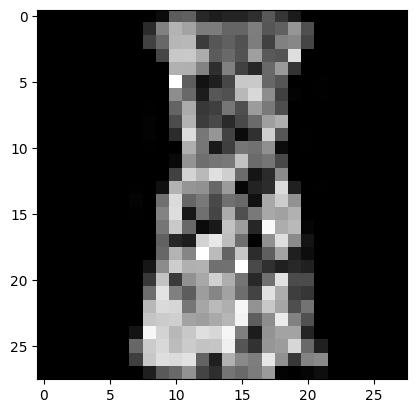

predicted_class:  ['Dress']
target_class:  ['Dress']


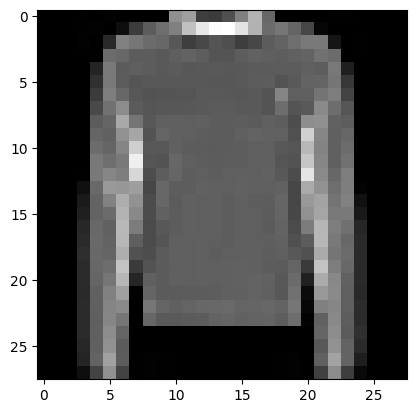

predicted_class:  ['Pullover']
target_class:  ['Pullover']


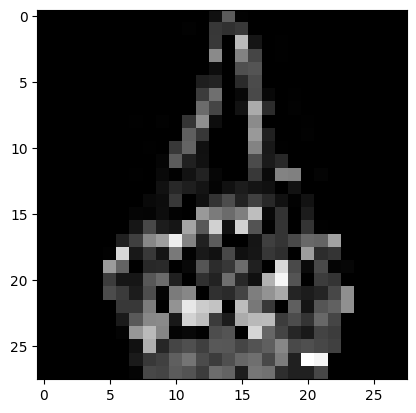

predicted_class:  ['Bag']
target_class:  ['Bag']


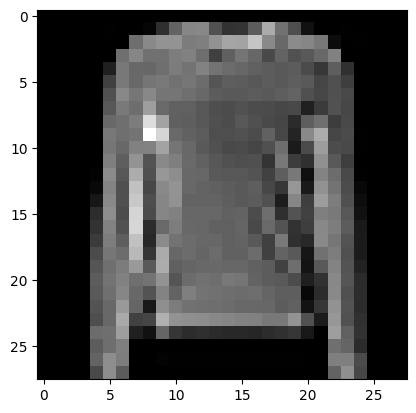

predicted_class:  ['Pullover']
target_class:  ['Pullover']


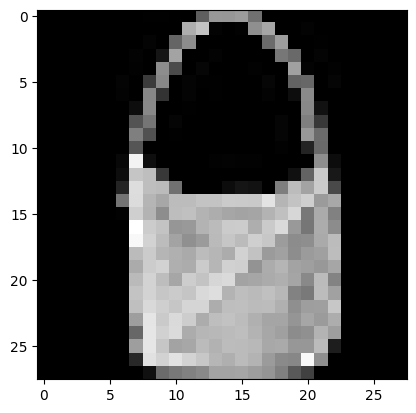

predicted_class:  ['Bag']
target_class:  ['Bag']


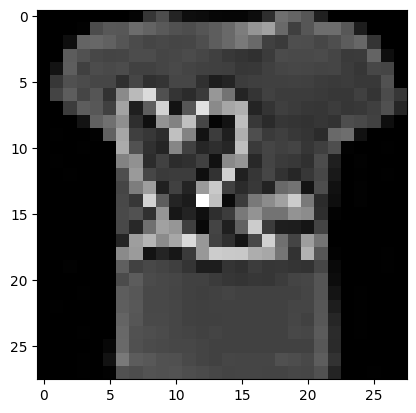

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


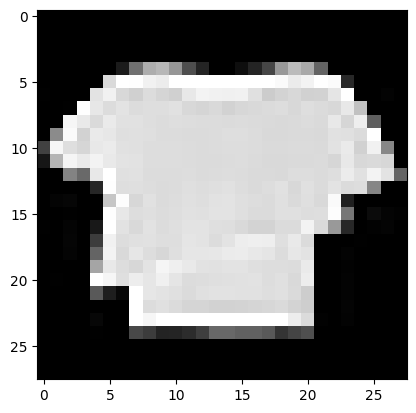

predicted_class:  ['Shirt']
target_class:  ['Shirt']


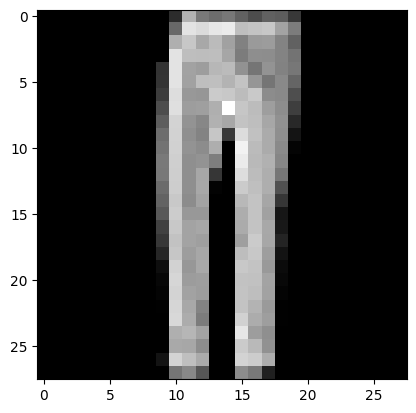

predicted_class:  ['Trouser']
target_class:  ['Trouser']


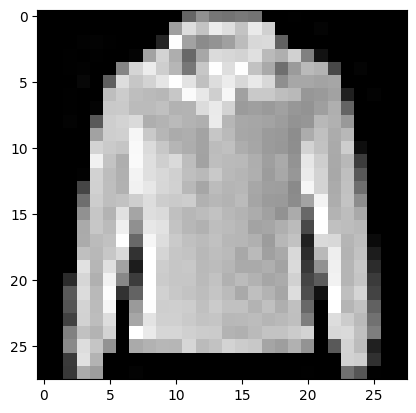

predicted_class:  ['Coat']
target_class:  ['Coat']


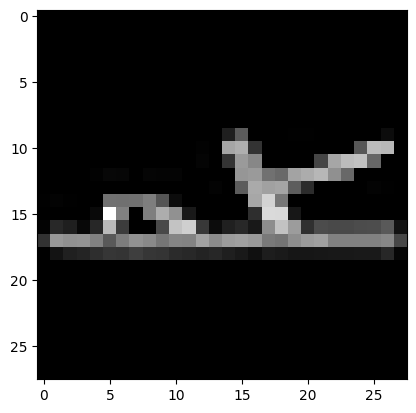

predicted_class:  ['Sandal']
target_class:  ['Sandal']


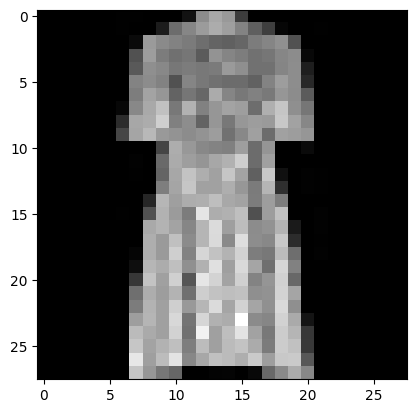

predicted_class:  ['Dress']
target_class:  ['Dress']


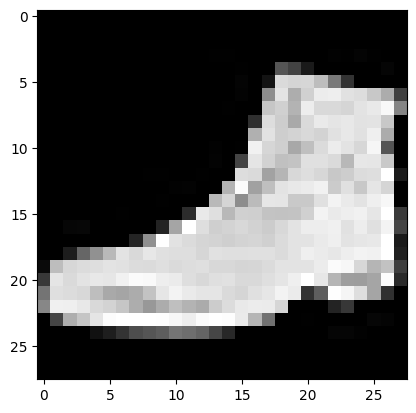

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


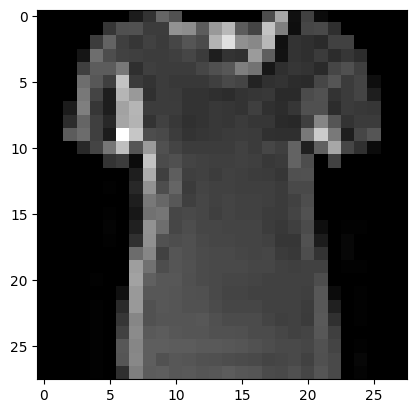

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


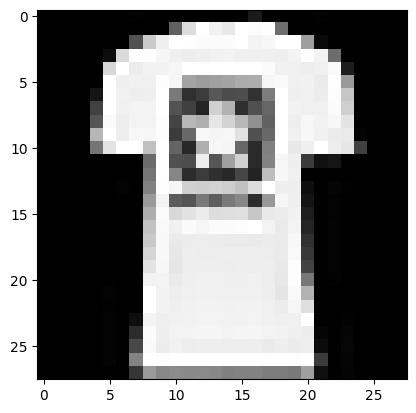

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


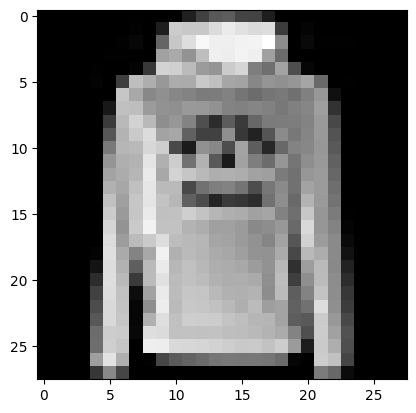

predicted_class:  ['Pullover']
target_class:  ['Pullover']


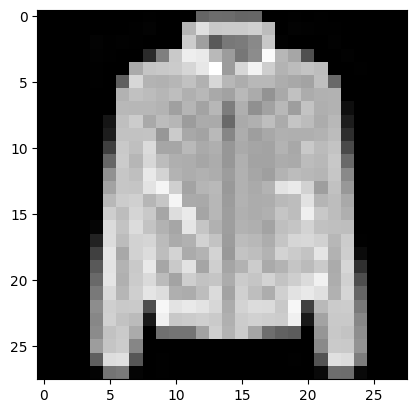

predicted_class:  ['Coat']
target_class:  ['Coat']


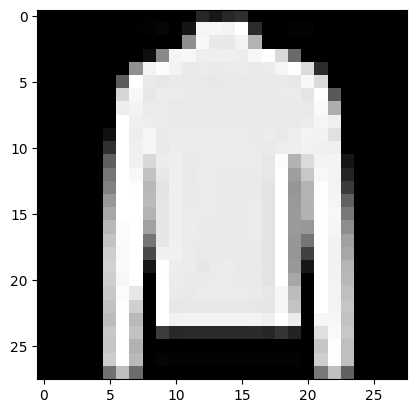

predicted_class:  ['Pullover']
target_class:  ['Pullover']


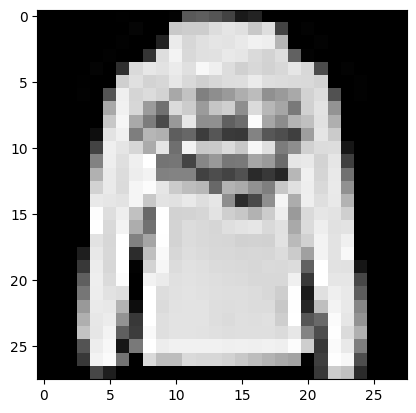

predicted_class:  ['Pullover']
target_class:  ['Pullover']


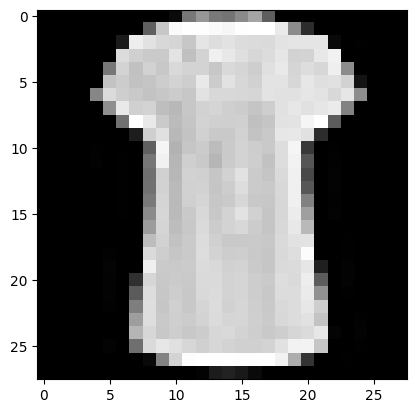

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


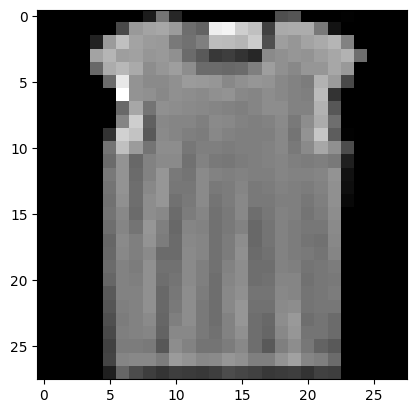

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


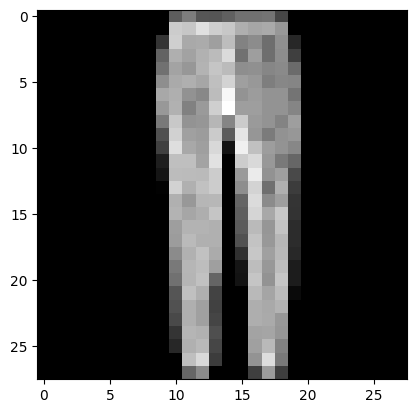

predicted_class:  ['Trouser']
target_class:  ['Trouser']


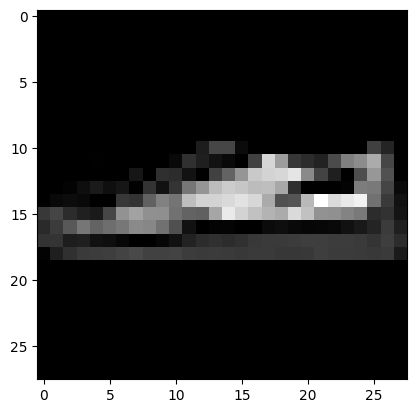

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


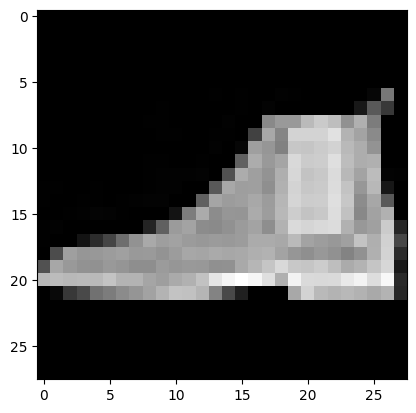

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


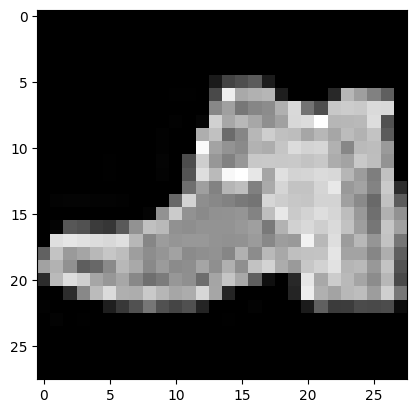

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


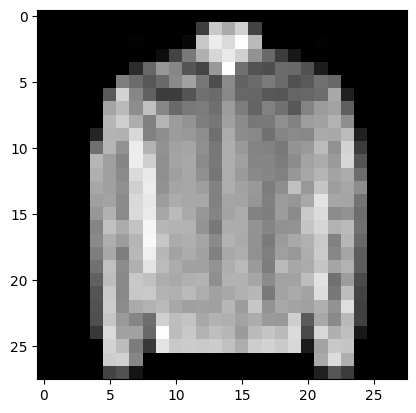

predicted_class:  ['Coat']
target_class:  ['Coat']


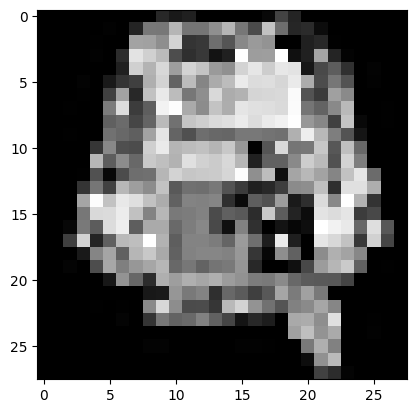

predicted_class:  ['Shirt']
target_class:  ['Shirt']


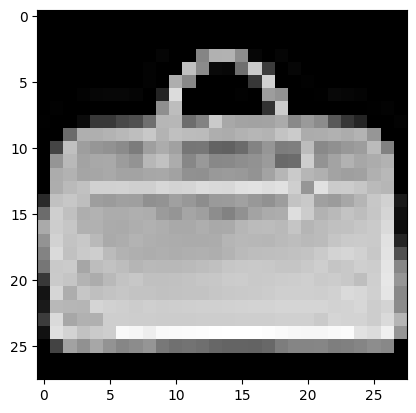

predicted_class:  ['Bag']
target_class:  ['Bag']


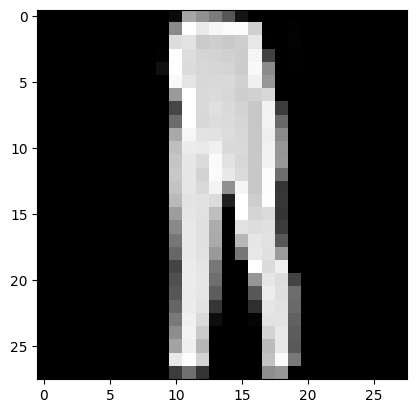

predicted_class:  ['Trouser']
target_class:  ['Trouser']


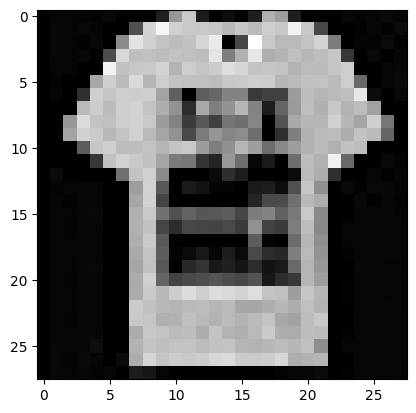

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


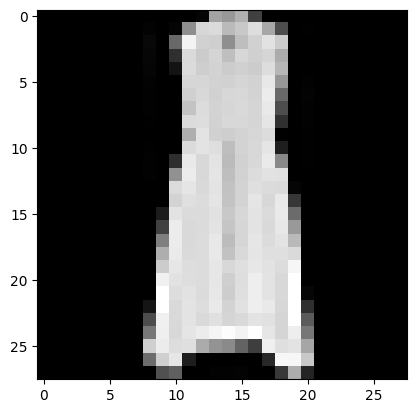

predicted_class:  ['Dress']
target_class:  ['Dress']


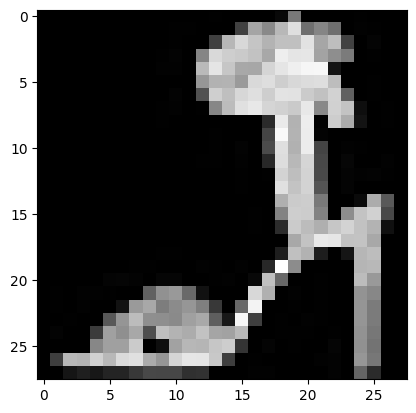

predicted_class:  ['Sandal']
target_class:  ['Sandal']


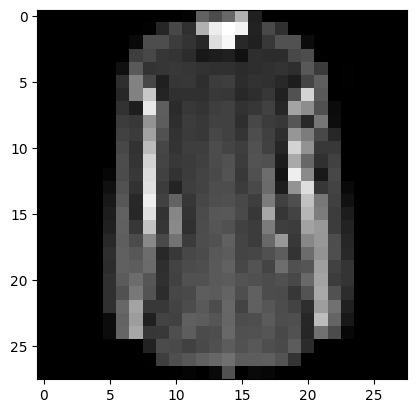

predicted_class:  ['Coat']
target_class:  ['Coat']


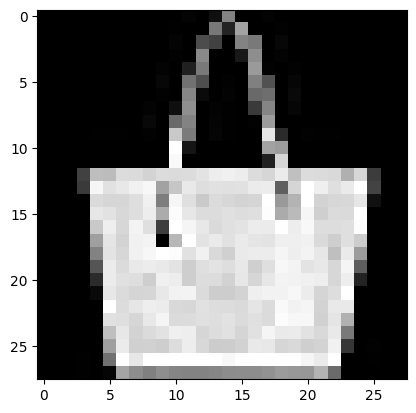

predicted_class:  ['Bag']
target_class:  ['Bag']


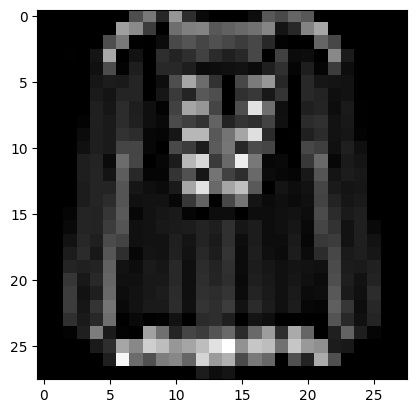

predicted_class:  ['Pullover']
target_class:  ['Shirt']


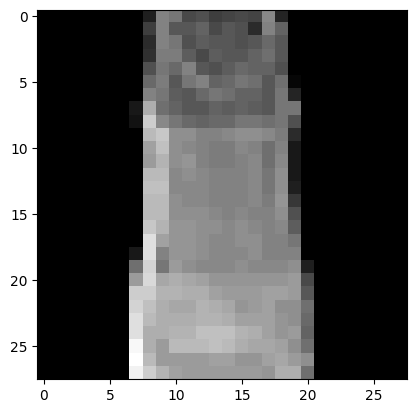

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


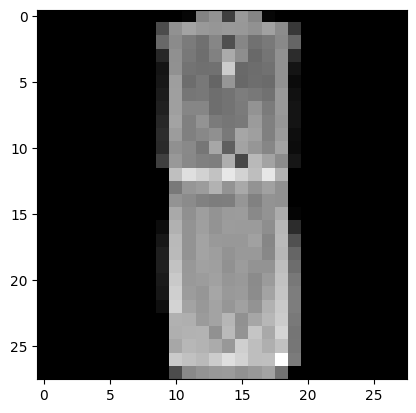

predicted_class:  ['Dress']
target_class:  ['Dress']


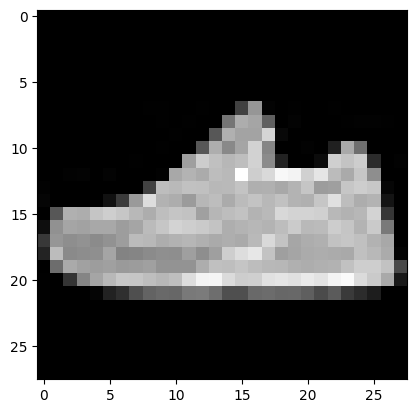

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


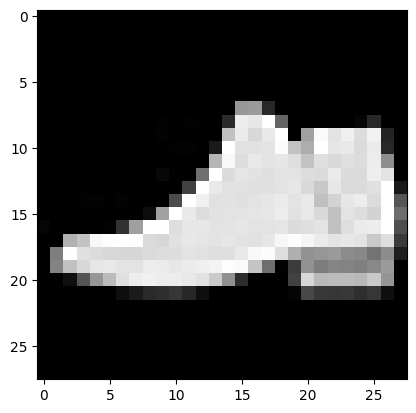

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


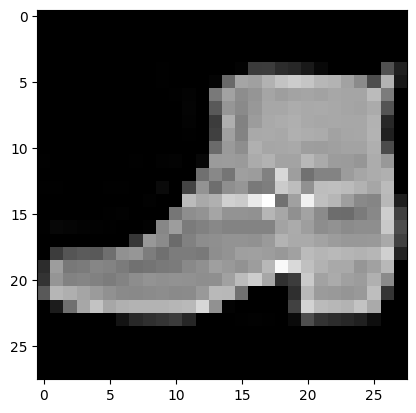

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


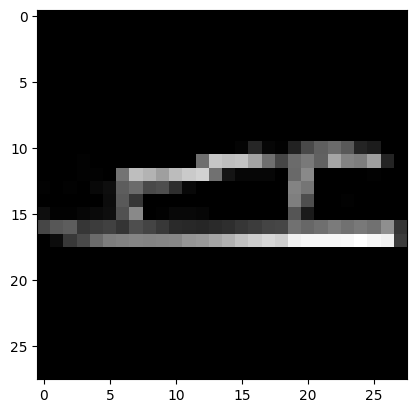

predicted_class:  ['Sandal']
target_class:  ['Sandal']


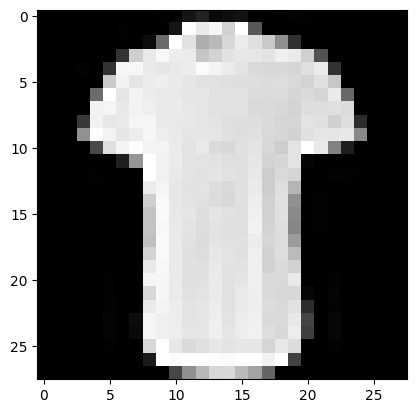

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


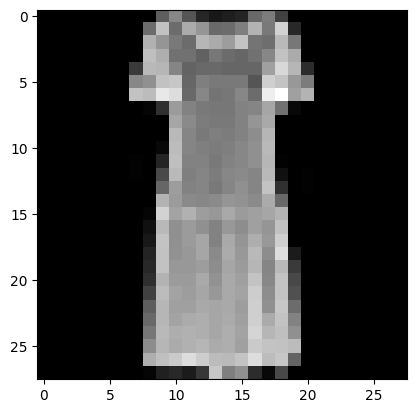

predicted_class:  ['Dress']
target_class:  ['Dress']


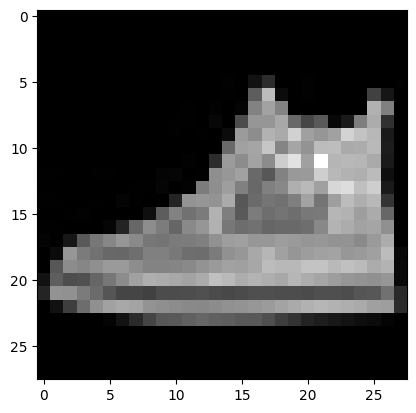

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


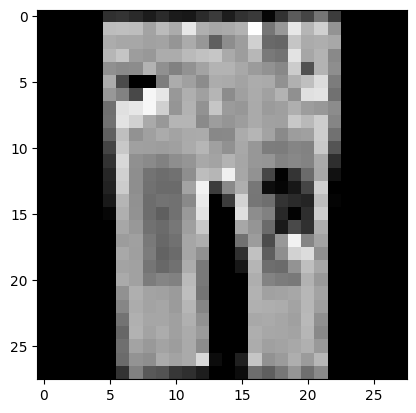

predicted_class:  ['Trouser']
target_class:  ['Trouser']


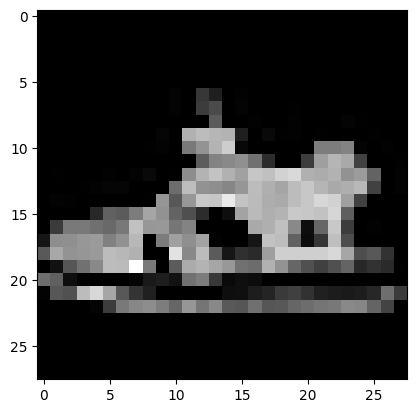

predicted_class:  ['Sandal']
target_class:  ['Sandal']


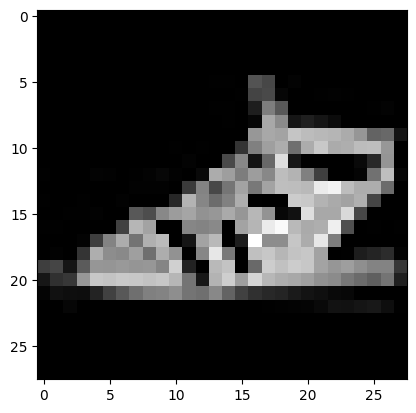

predicted_class:  ['Sandal']
target_class:  ['Sandal']


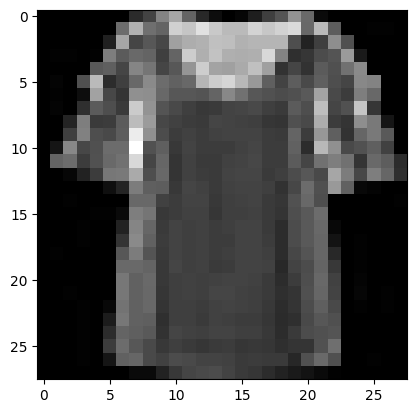

predicted_class:  ['Shirt']
target_class:  ['Shirt']


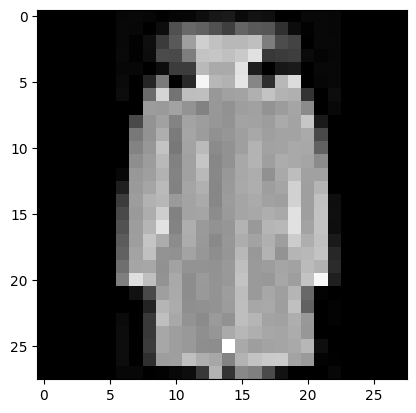

predicted_class:  ['Coat']
target_class:  ['Coat']


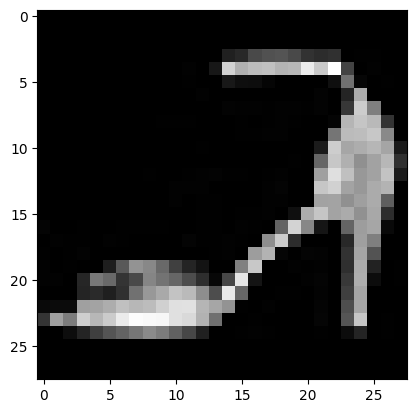

predicted_class:  ['Sandal']
target_class:  ['Sandal']


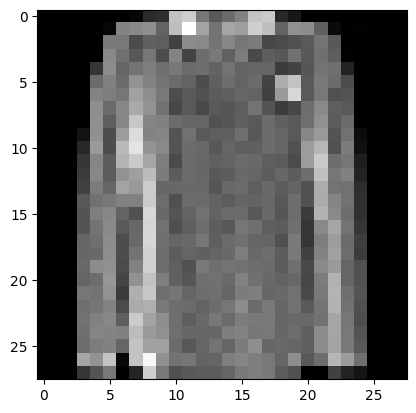

predicted_class:  ['Shirt']
target_class:  ['Shirt']


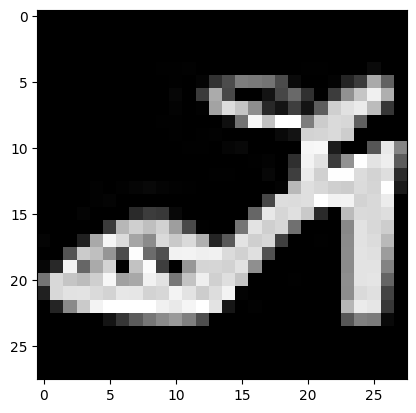

predicted_class:  ['Sandal']
target_class:  ['Sandal']


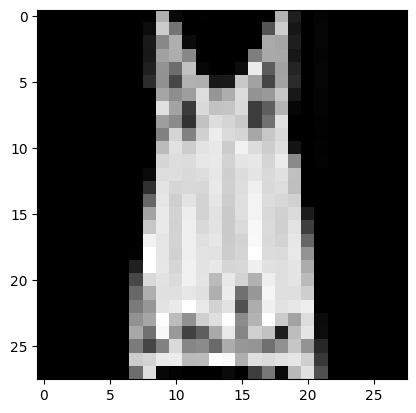

predicted_class:  ['Dress']
target_class:  ['Shirt']


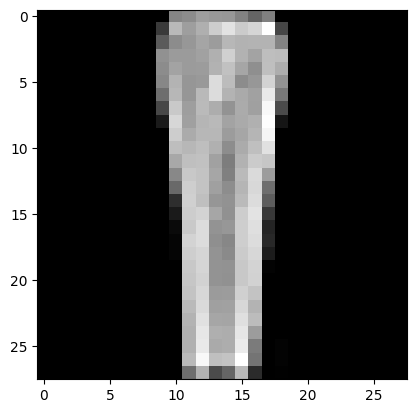

predicted_class:  ['Trouser']
target_class:  ['Trouser']


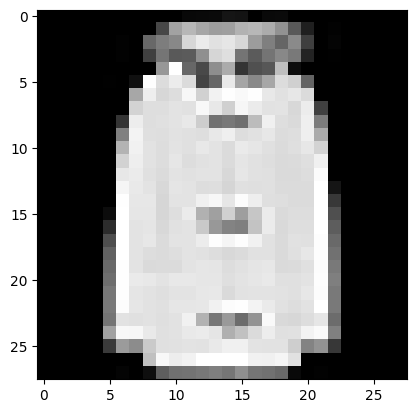

predicted_class:  ['Coat']
target_class:  ['Coat']


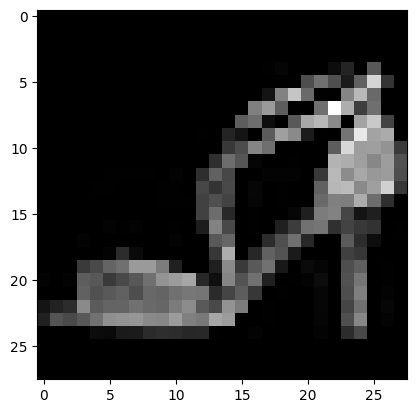

predicted_class:  ['Sandal']
target_class:  ['Sandal']


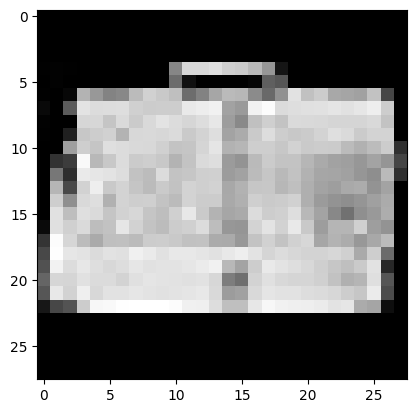

predicted_class:  ['Bag']
target_class:  ['Bag']


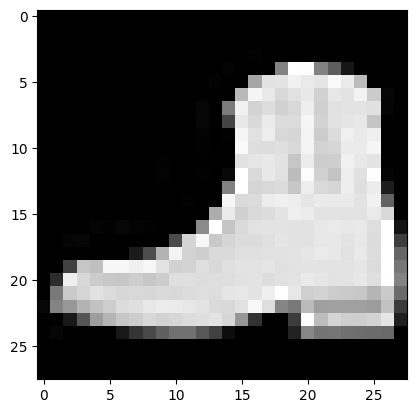

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


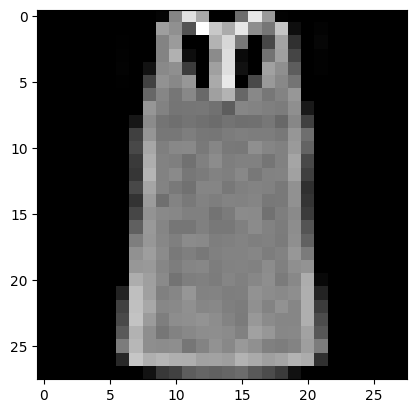

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


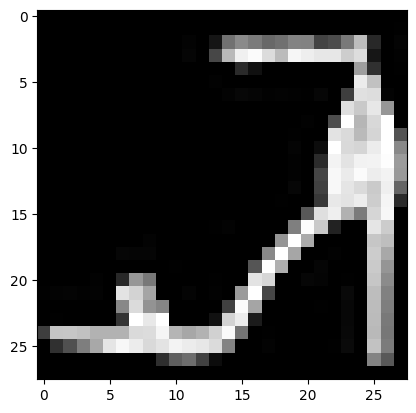

predicted_class:  ['Sandal']
target_class:  ['Sandal']


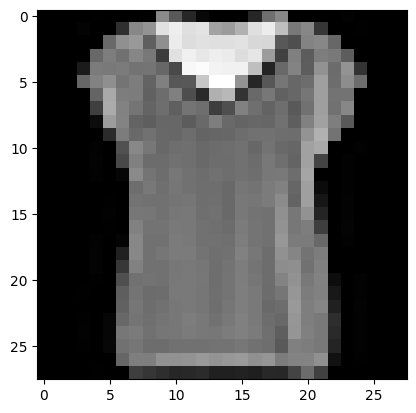

predicted_class:  ['T-shirt/top']
target_class:  ['Shirt']


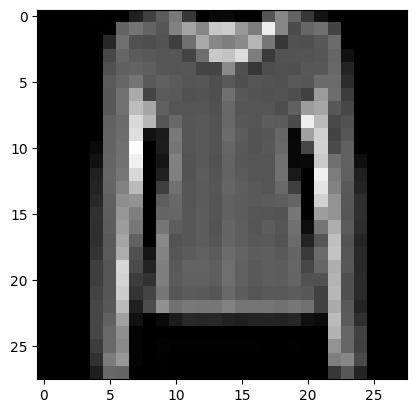

predicted_class:  ['Pullover']
target_class:  ['Pullover']


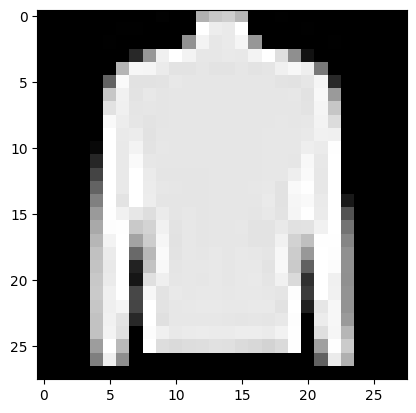

predicted_class:  ['Pullover']
target_class:  ['Pullover']


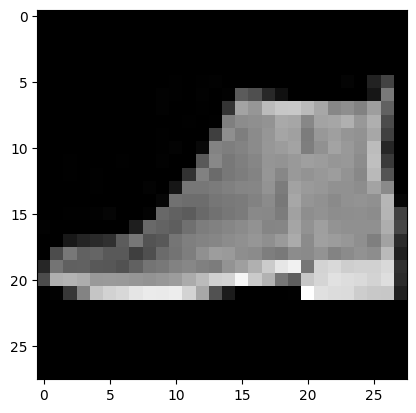

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


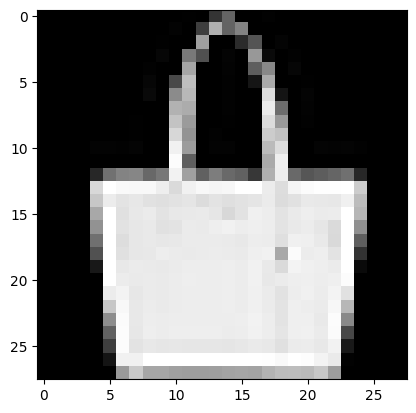

predicted_class:  ['Bag']
target_class:  ['Bag']


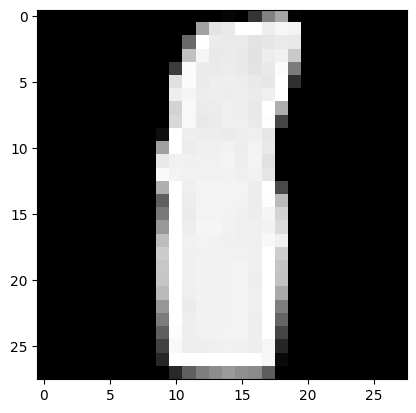

predicted_class:  ['Dress']
target_class:  ['Dress']


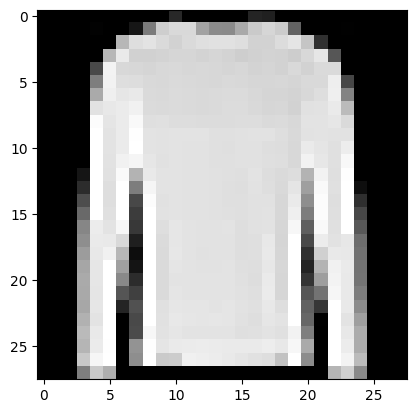

predicted_class:  ['Pullover']
target_class:  ['Pullover']


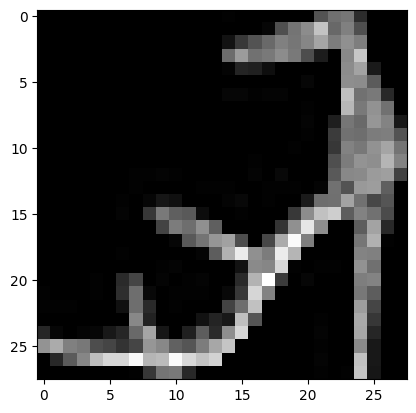

predicted_class:  ['Sandal']
target_class:  ['Sandal']


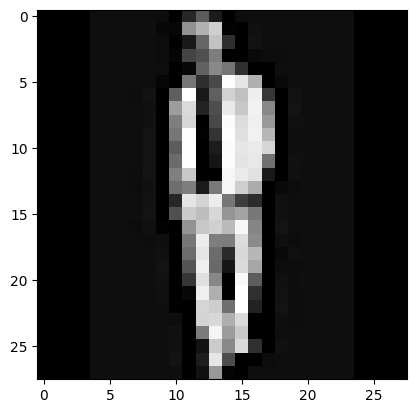

predicted_class:  ['Shirt']
target_class:  ['Trouser']


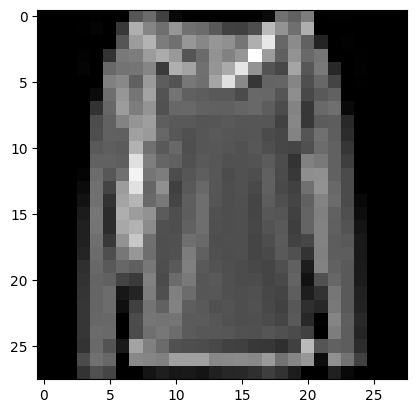

predicted_class:  ['Pullover']
target_class:  ['Pullover']


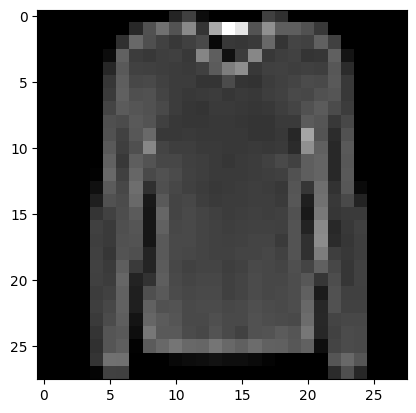

predicted_class:  ['Shirt']
target_class:  ['Pullover']


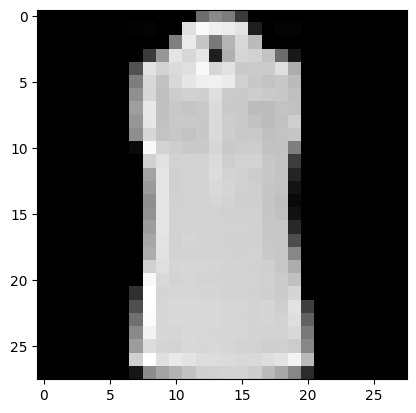

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


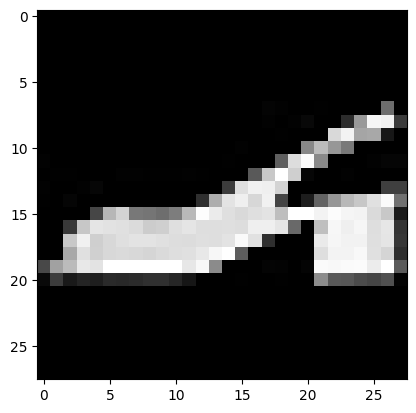

predicted_class:  ['Sandal']
target_class:  ['Sandal']


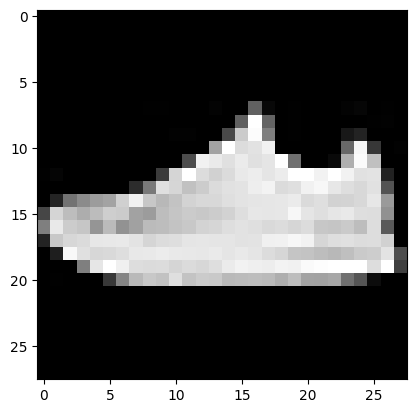

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


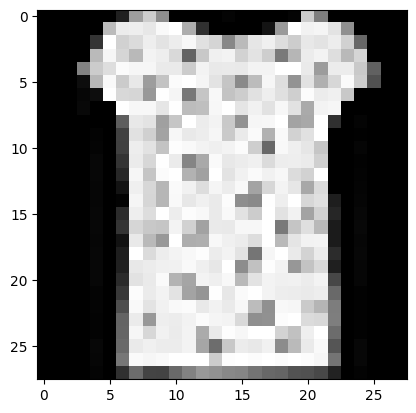

predicted_class:  ['Shirt']
target_class:  ['Shirt']


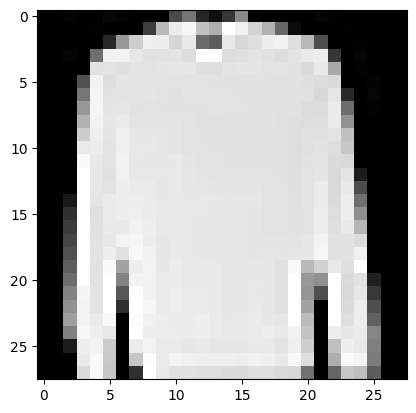

predicted_class:  ['Pullover']
target_class:  ['Pullover']


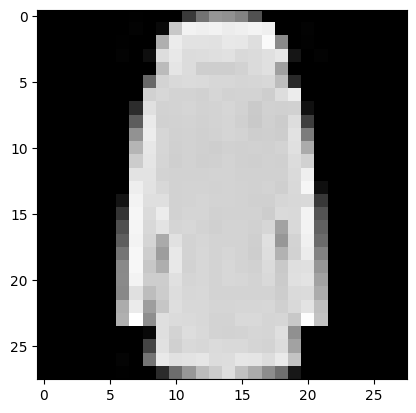

predicted_class:  ['Coat']
target_class:  ['Coat']


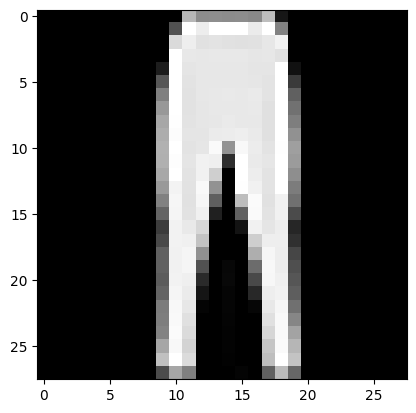

predicted_class:  ['Trouser']
target_class:  ['Trouser']


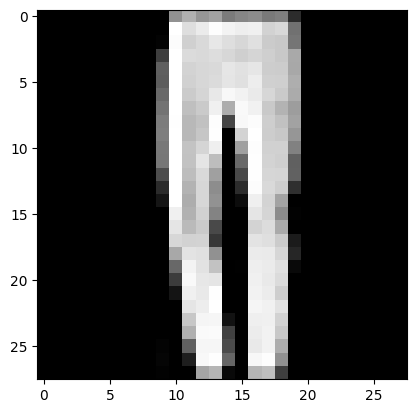

predicted_class:  ['Trouser']
target_class:  ['Trouser']


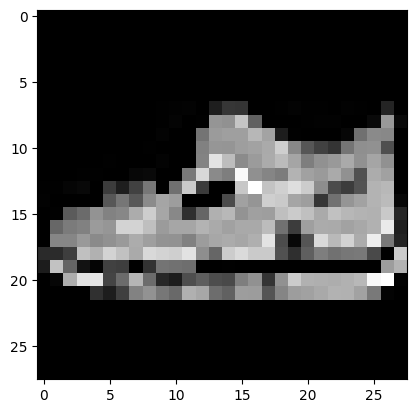

predicted_class:  ['Sandal']
target_class:  ['Sandal']


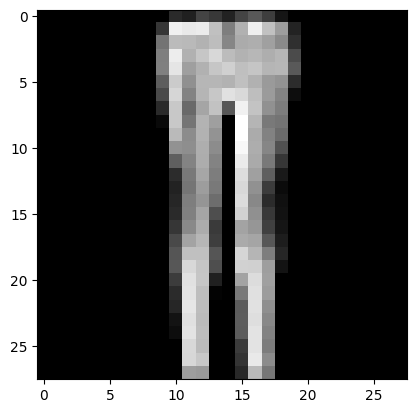

predicted_class:  ['Trouser']
target_class:  ['Trouser']


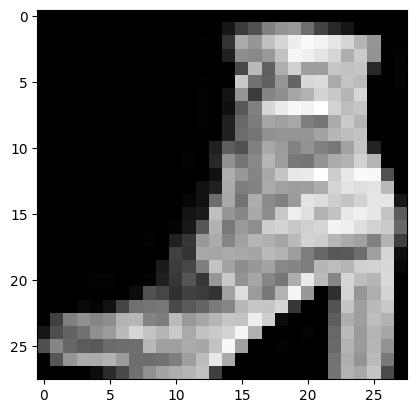

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


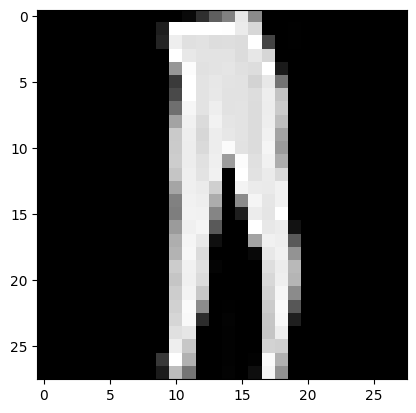

predicted_class:  ['Trouser']
target_class:  ['Trouser']


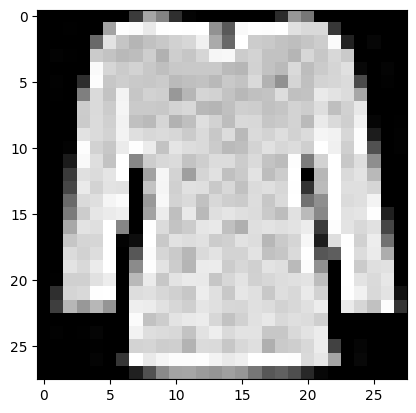

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


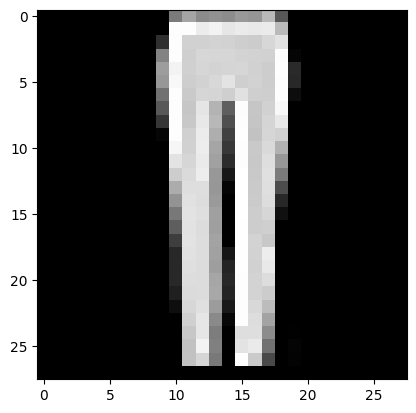

predicted_class:  ['Trouser']
target_class:  ['Trouser']


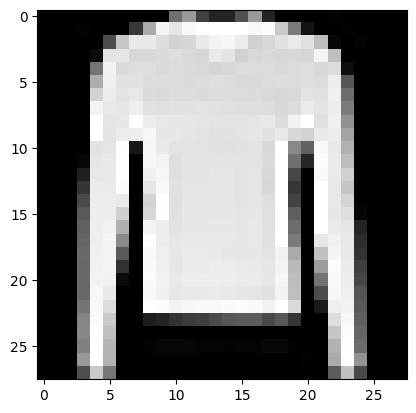

predicted_class:  ['Pullover']
target_class:  ['Pullover']


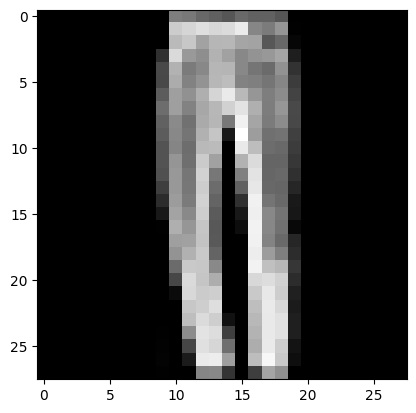

predicted_class:  ['Trouser']
target_class:  ['Trouser']


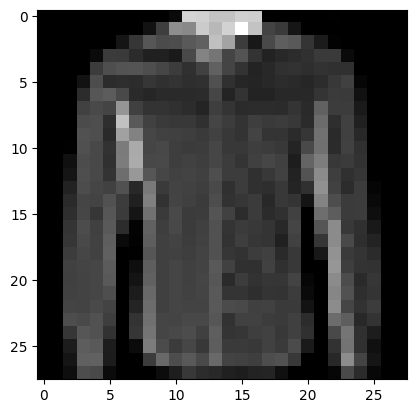

predicted_class:  ['Shirt']
target_class:  ['Shirt']


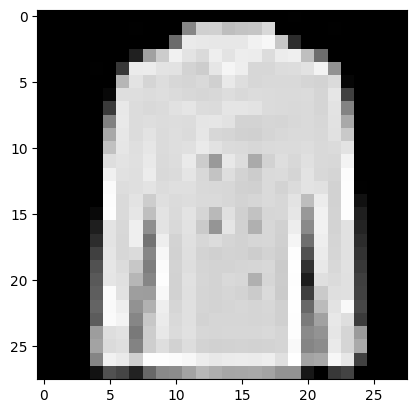

predicted_class:  ['Coat']
target_class:  ['Coat']


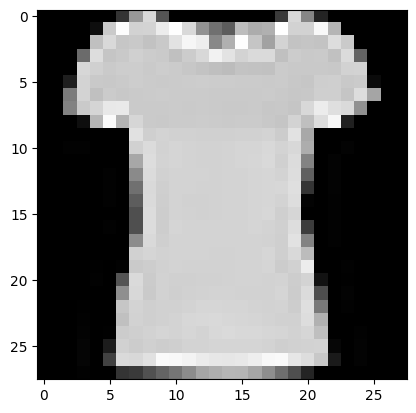

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


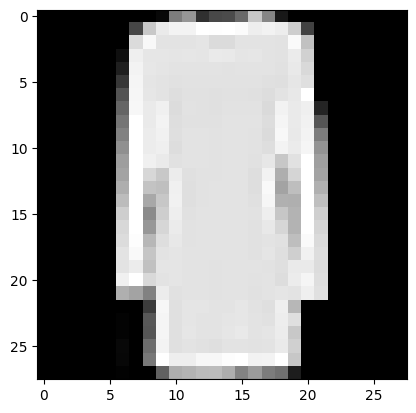

predicted_class:  ['Dress']
target_class:  ['Coat']


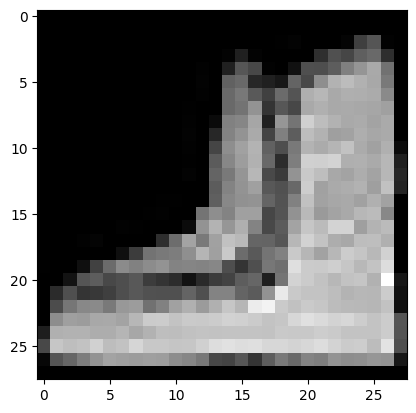

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


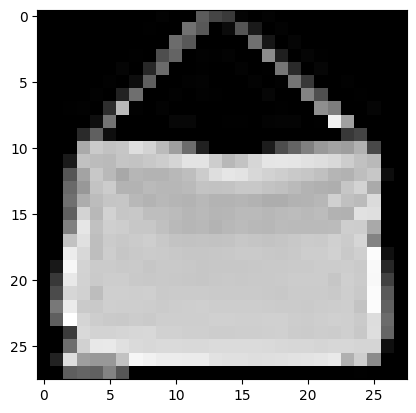

predicted_class:  ['Bag']
target_class:  ['Bag']


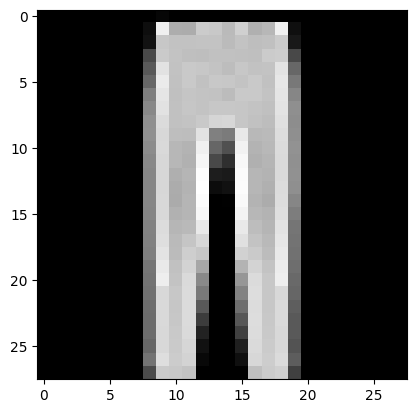

predicted_class:  ['Trouser']
target_class:  ['Trouser']


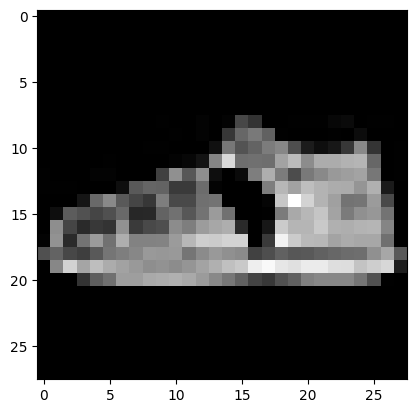

predicted_class:  ['Sandal']
target_class:  ['Sandal']


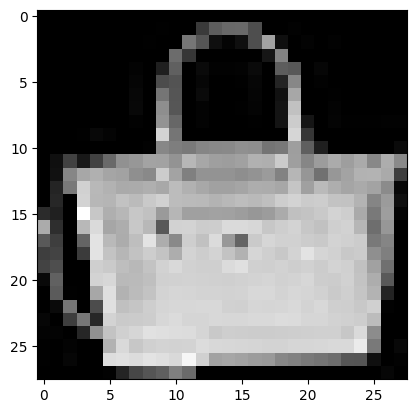

predicted_class:  ['Bag']
target_class:  ['Bag']


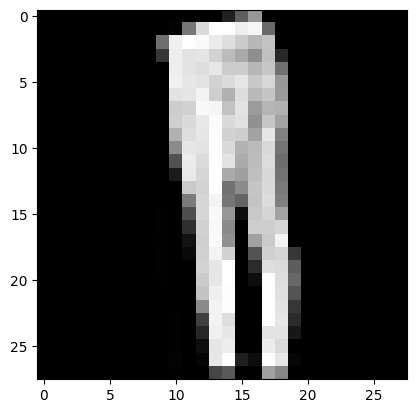

predicted_class:  ['Trouser']
target_class:  ['Trouser']


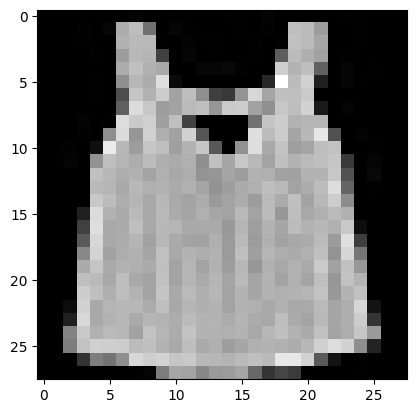

predicted_class:  ['Shirt']
target_class:  ['T-shirt/top']


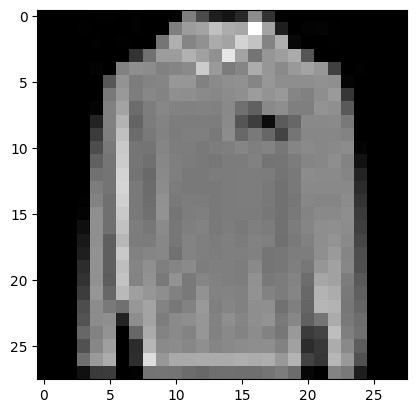

predicted_class:  ['Pullover']
target_class:  ['Pullover']


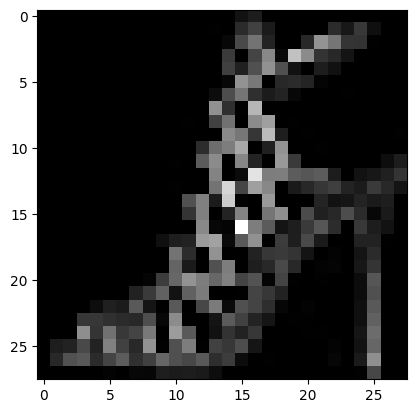

predicted_class:  ['Sandal']
target_class:  ['Sandal']


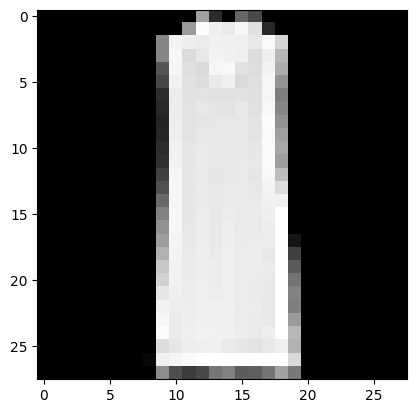

predicted_class:  ['Dress']
target_class:  ['Dress']


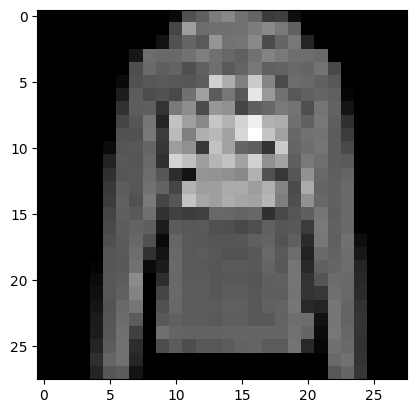

predicted_class:  ['Pullover']
target_class:  ['Pullover']


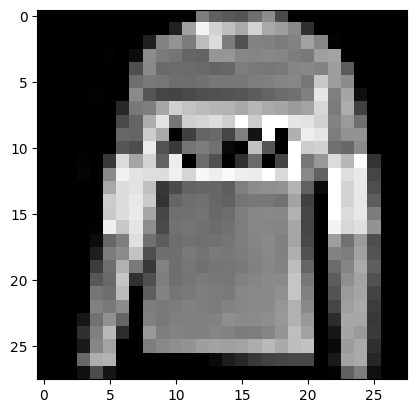

predicted_class:  ['Pullover']
target_class:  ['Pullover']


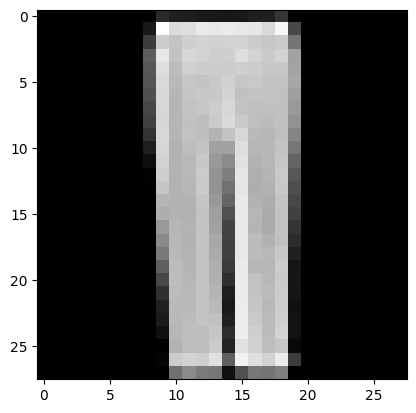

predicted_class:  ['Trouser']
target_class:  ['Trouser']


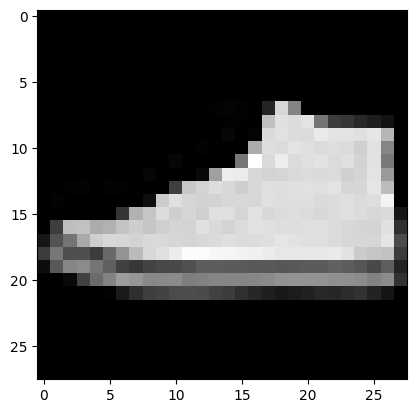

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


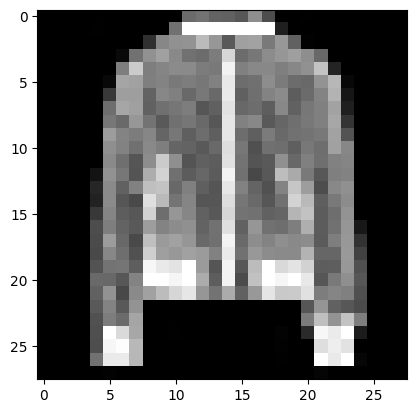

predicted_class:  ['Coat']
target_class:  ['Coat']


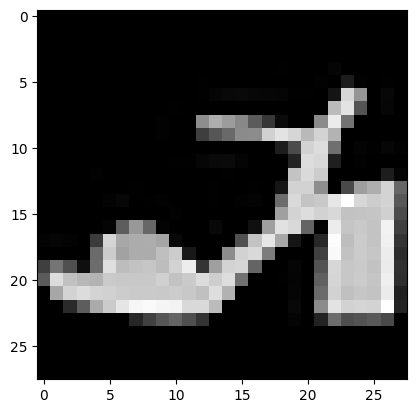

predicted_class:  ['Sandal']
target_class:  ['Sandal']


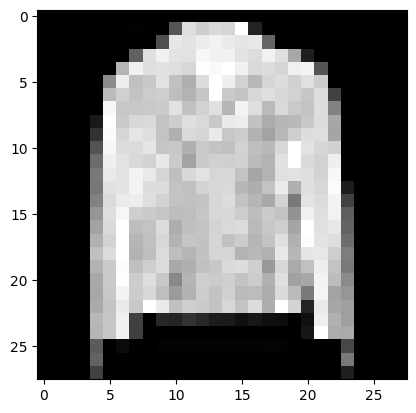

predicted_class:  ['Coat']
target_class:  ['Coat']


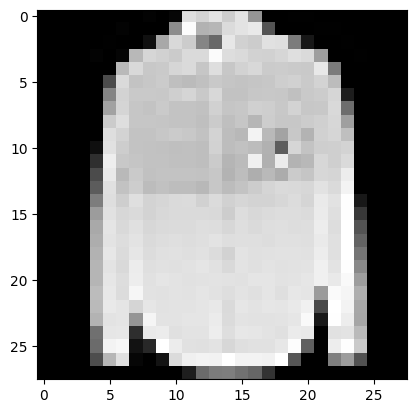

predicted_class:  ['Shirt']
target_class:  ['Shirt']


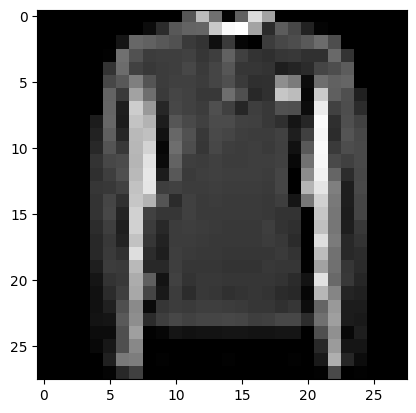

predicted_class:  ['Pullover']
target_class:  ['Pullover']


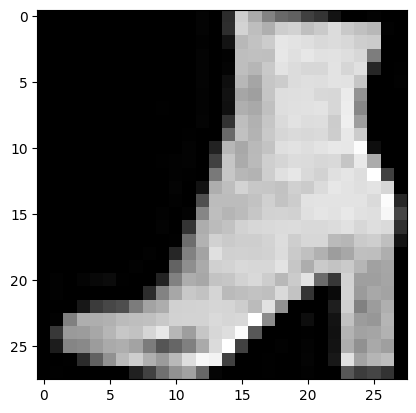

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


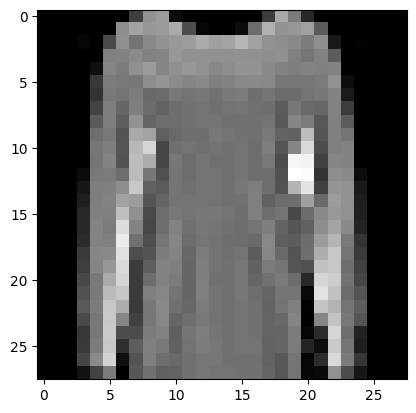

predicted_class:  ['Pullover']
target_class:  ['Pullover']


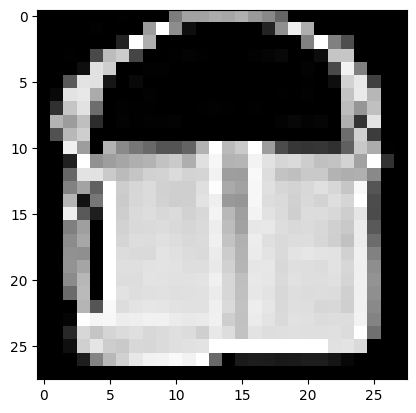

predicted_class:  ['Bag']
target_class:  ['Bag']


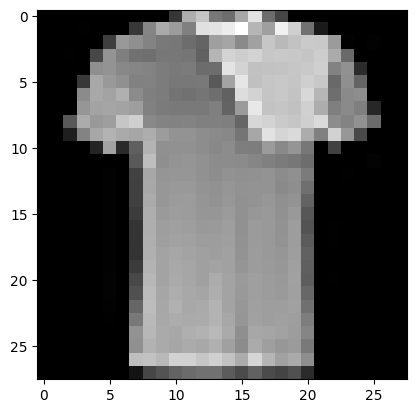

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


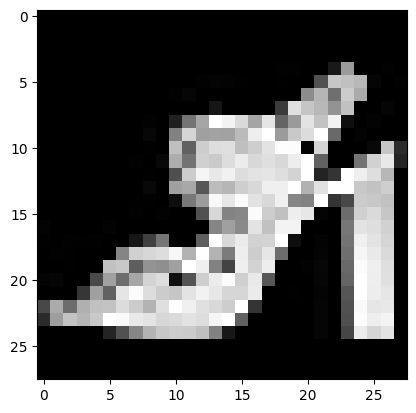

predicted_class:  ['Sandal']
target_class:  ['Sandal']


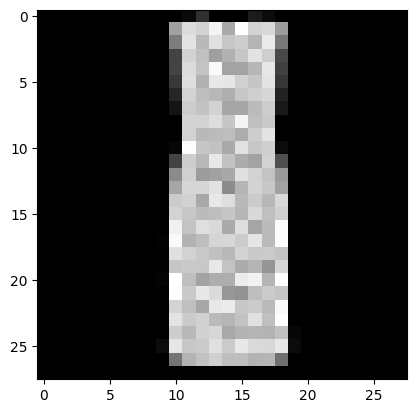

predicted_class:  ['Dress']
target_class:  ['Dress']


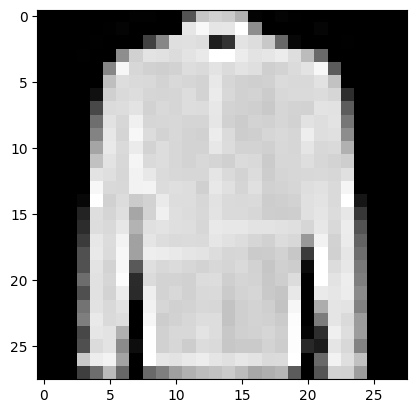

predicted_class:  ['Shirt']
target_class:  ['Shirt']


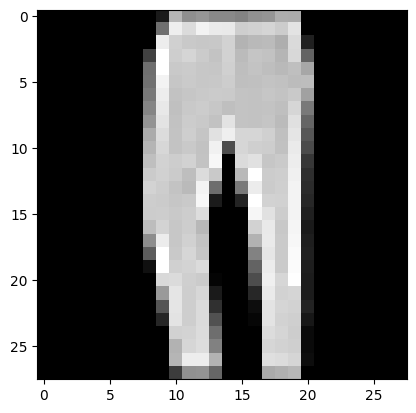

predicted_class:  ['Trouser']
target_class:  ['Trouser']


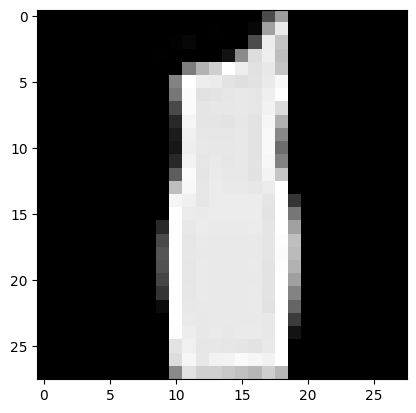

predicted_class:  ['Dress']
target_class:  ['Dress']


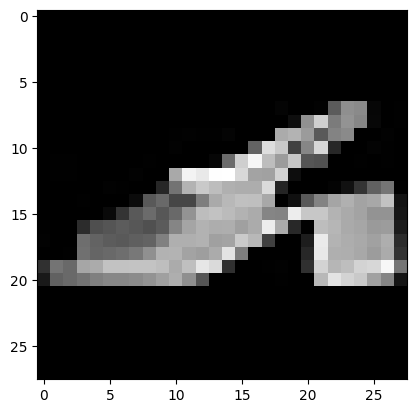

predicted_class:  ['Sandal']
target_class:  ['Sandal']


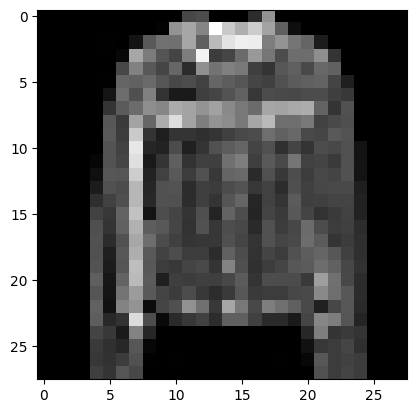

predicted_class:  ['Coat']
target_class:  ['Coat']


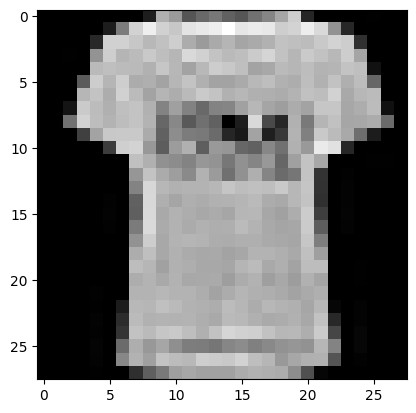

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


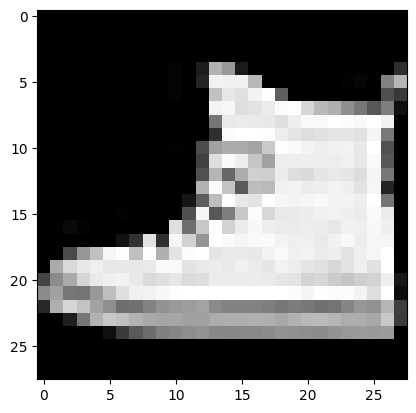

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


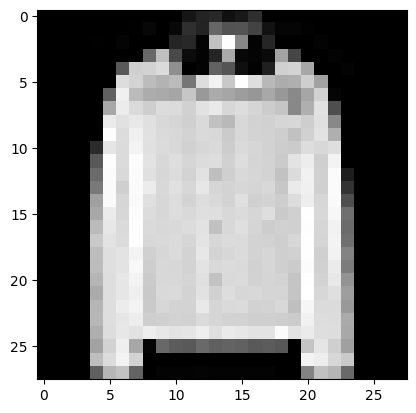

predicted_class:  ['Coat']
target_class:  ['Coat']


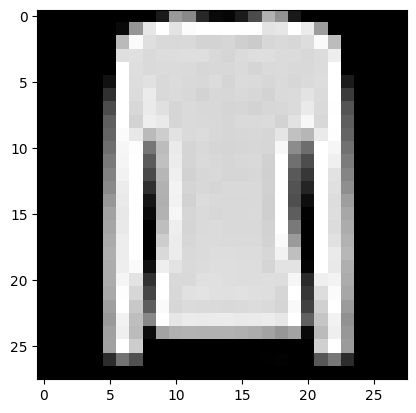

predicted_class:  ['Pullover']
target_class:  ['Pullover']


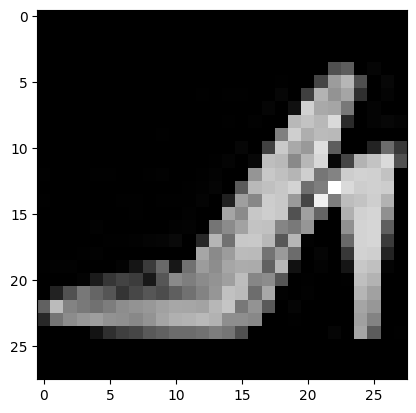

predicted_class:  ['Ankle boot']
target_class:  ['Sandal']


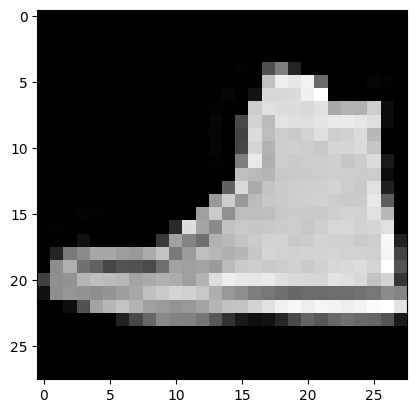

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


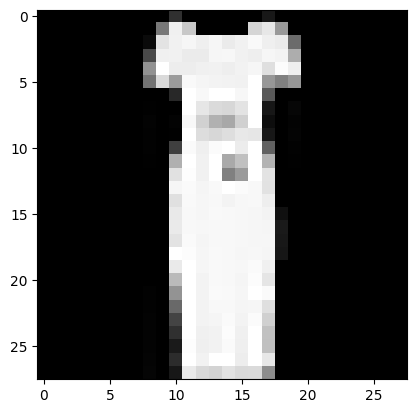

predicted_class:  ['Dress']
target_class:  ['Dress']


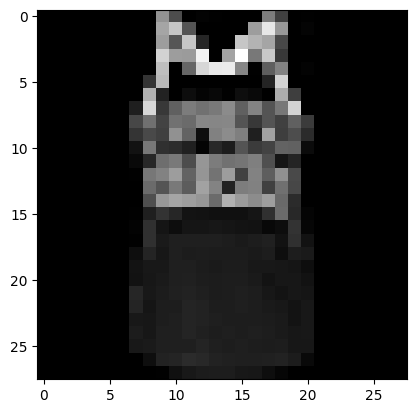

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


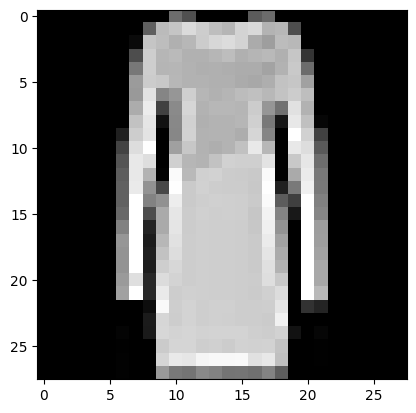

predicted_class:  ['Dress']
target_class:  ['Dress']


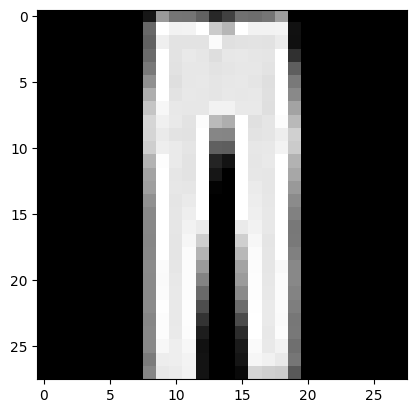

predicted_class:  ['Trouser']
target_class:  ['Trouser']


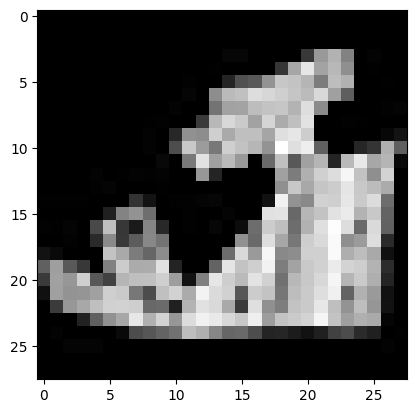

predicted_class:  ['Sandal']
target_class:  ['Sandal']


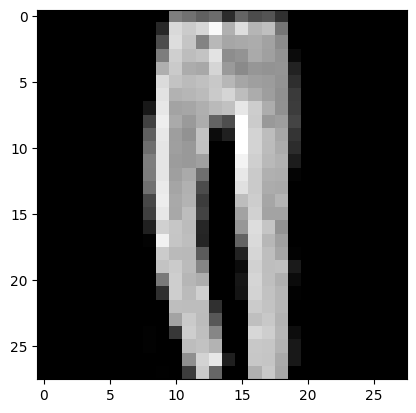

predicted_class:  ['Trouser']
target_class:  ['Trouser']


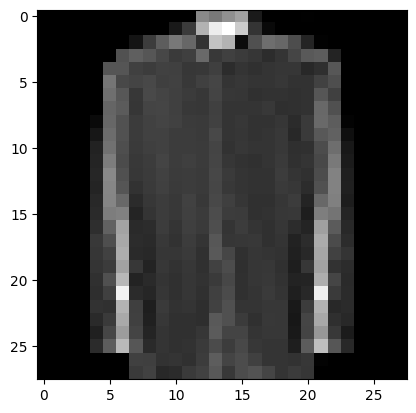

predicted_class:  ['Shirt']
target_class:  ['Shirt']


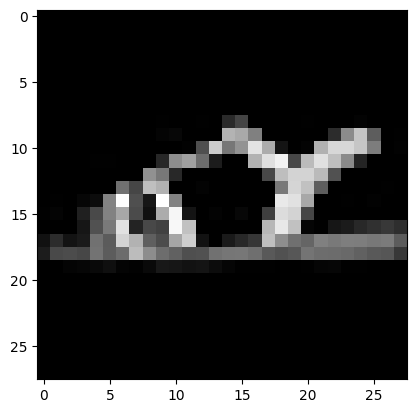

predicted_class:  ['Sandal']
target_class:  ['Sandal']


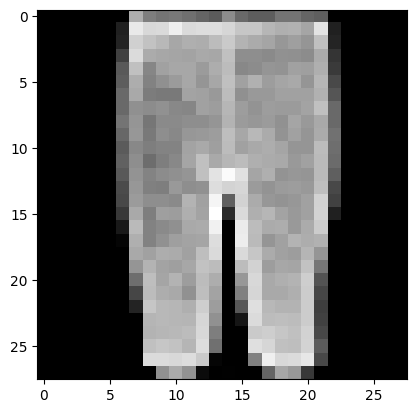

predicted_class:  ['Trouser']
target_class:  ['Trouser']


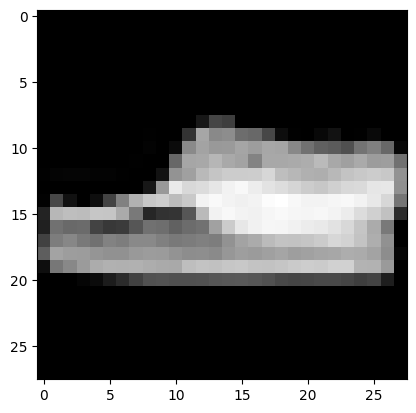

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


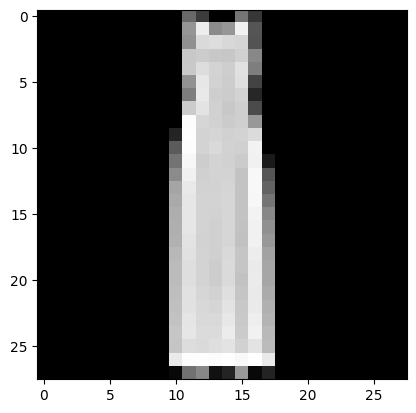

predicted_class:  ['Dress']
target_class:  ['Dress']


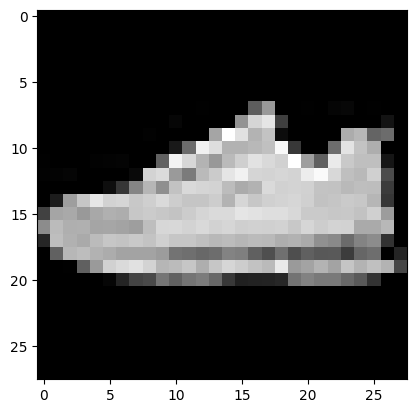

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


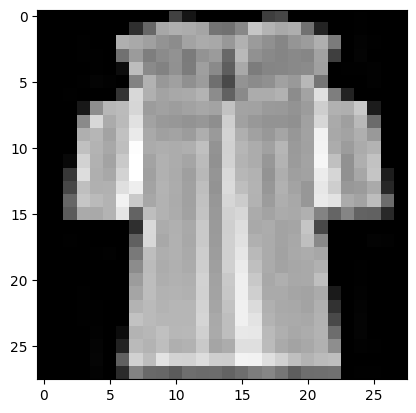

predicted_class:  ['Shirt']
target_class:  ['Shirt']


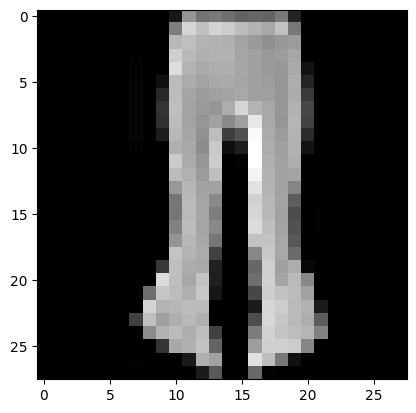

predicted_class:  ['Trouser']
target_class:  ['Trouser']


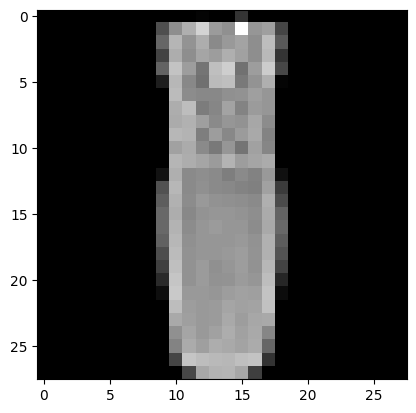

predicted_class:  ['Dress']
target_class:  ['Dress']


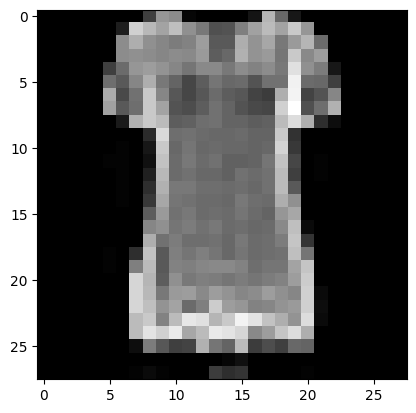

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


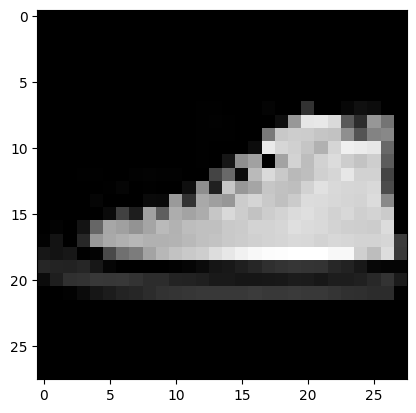

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


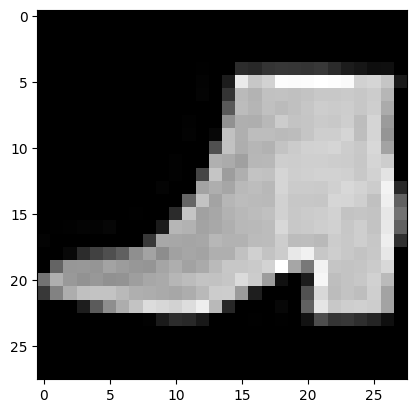

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


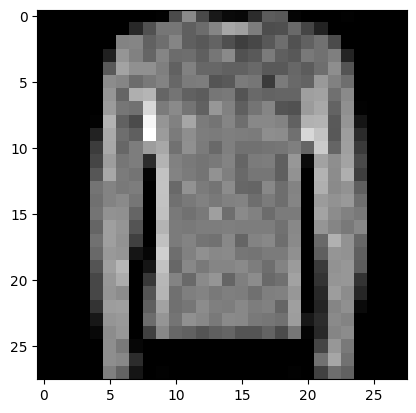

predicted_class:  ['Pullover']
target_class:  ['Pullover']


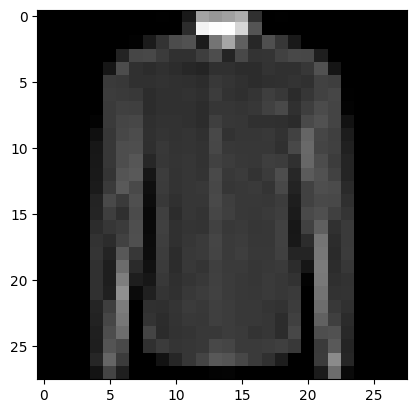

predicted_class:  ['Shirt']
target_class:  ['Shirt']


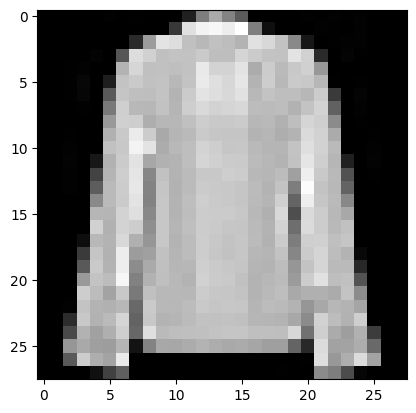

predicted_class:  ['Shirt']
target_class:  ['Shirt']


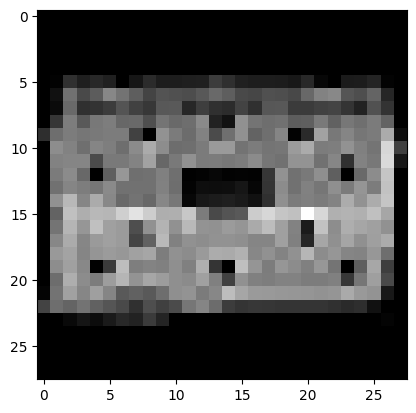

predicted_class:  ['Bag']
target_class:  ['Bag']


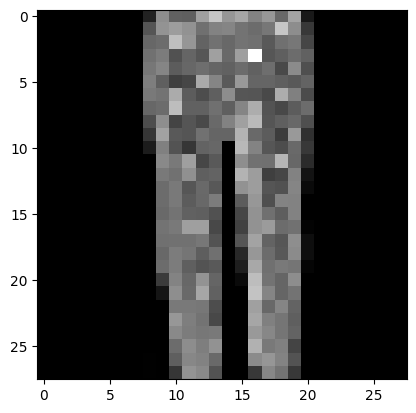

predicted_class:  ['Trouser']
target_class:  ['Trouser']


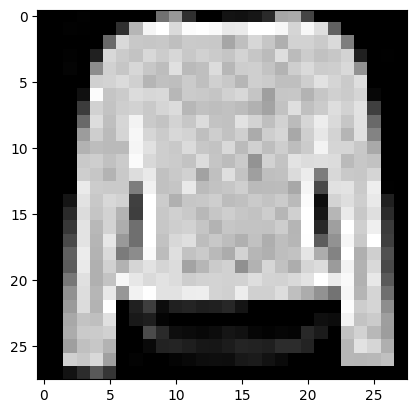

predicted_class:  ['Pullover']
target_class:  ['Pullover']


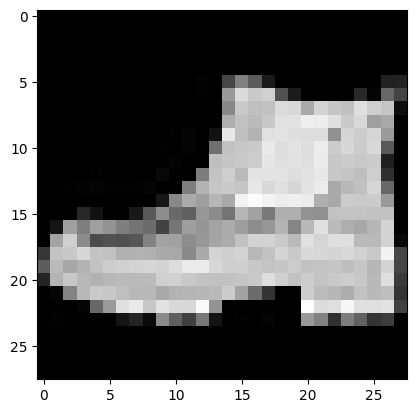

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


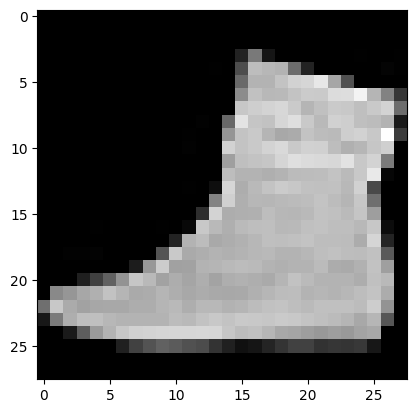

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


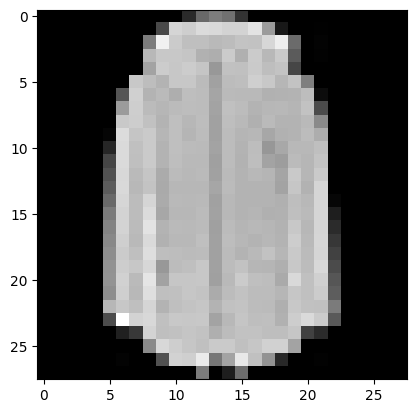

predicted_class:  ['Coat']
target_class:  ['Coat']


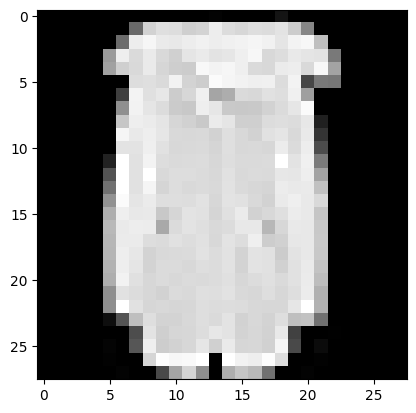

predicted_class:  ['Coat']
target_class:  ['Coat']


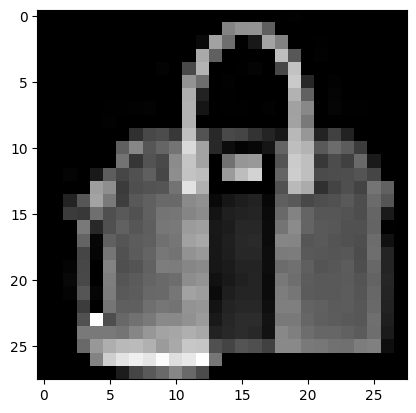

predicted_class:  ['Bag']
target_class:  ['Bag']


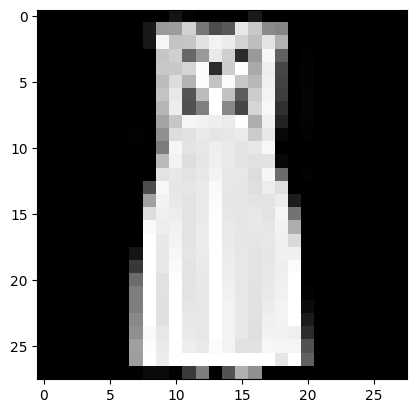

predicted_class:  ['Dress']
target_class:  ['Dress']


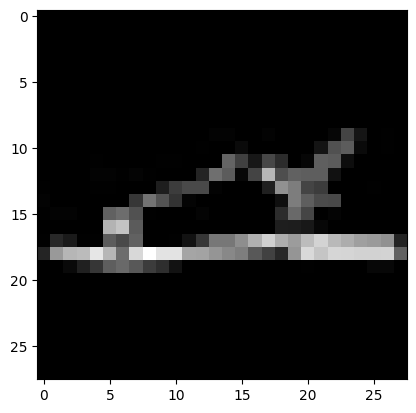

predicted_class:  ['Sandal']
target_class:  ['Sandal']


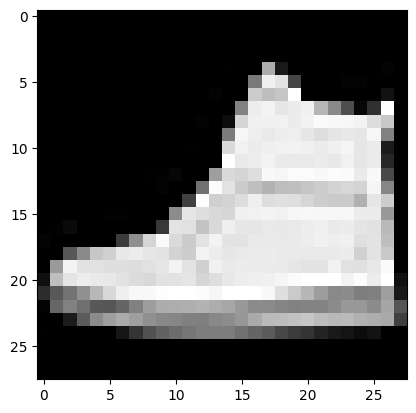

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


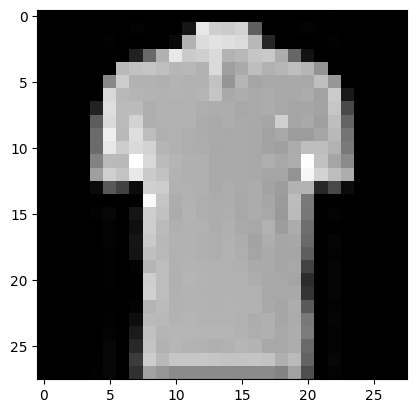

predicted_class:  ['T-shirt/top']
target_class:  ['T-shirt/top']


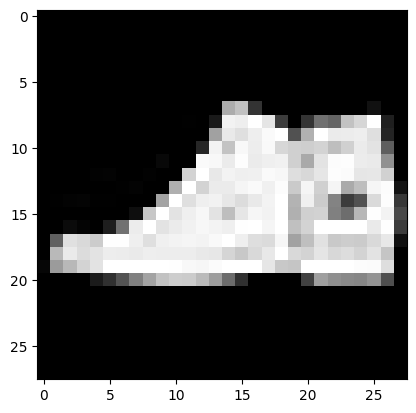

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


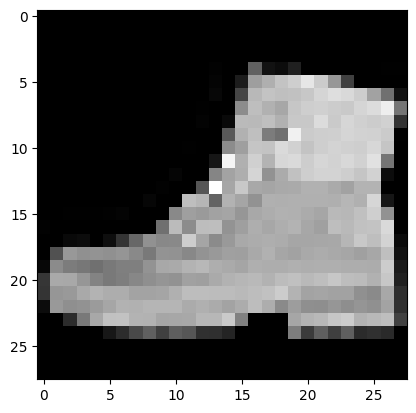

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


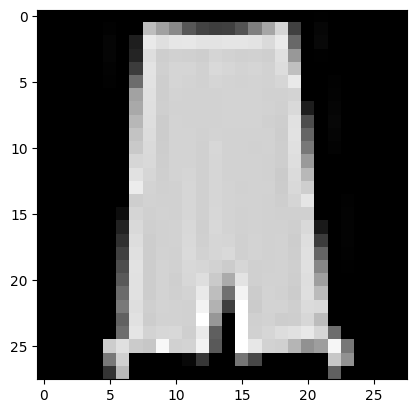

predicted_class:  ['Trouser']
target_class:  ['Trouser']


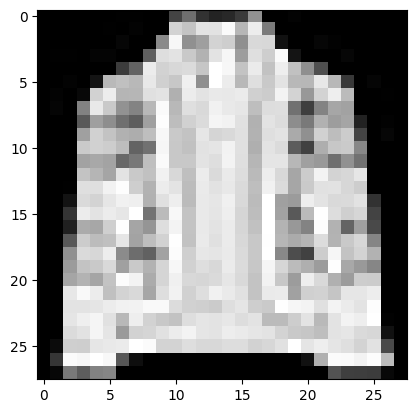

predicted_class:  ['Coat']
target_class:  ['Coat']


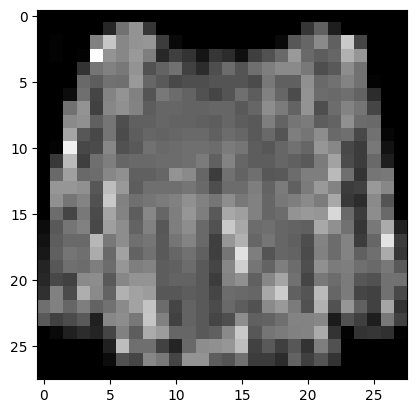

predicted_class:  ['Shirt']
target_class:  ['T-shirt/top']


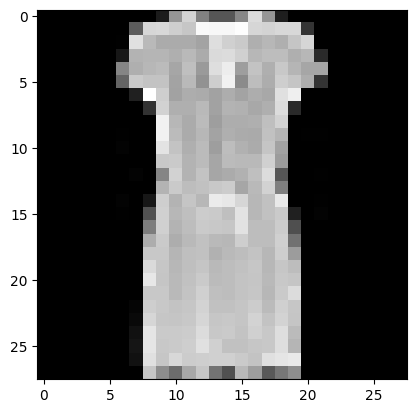

predicted_class:  ['Dress']
target_class:  ['Dress']


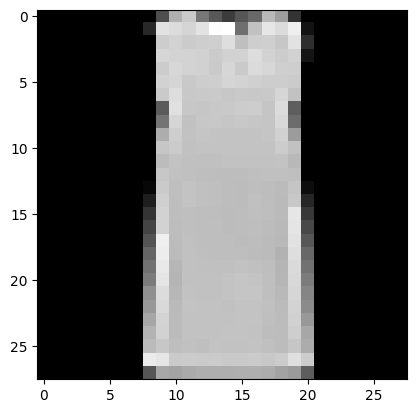

predicted_class:  ['Dress']
target_class:  ['Dress']


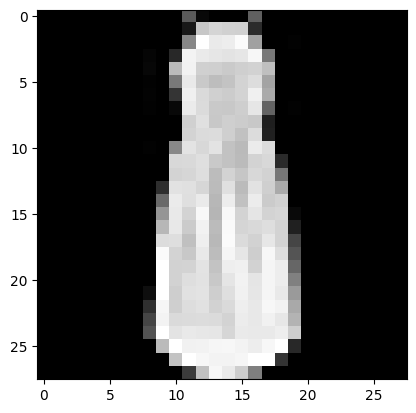

predicted_class:  ['Dress']
target_class:  ['Dress']


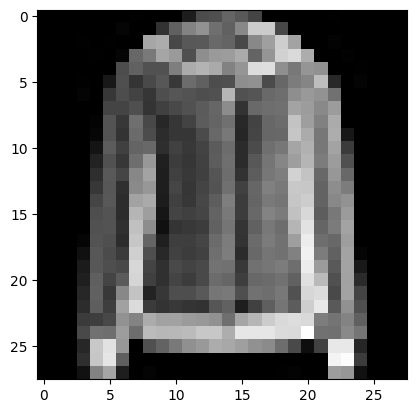

predicted_class:  ['Coat']
target_class:  ['Coat']


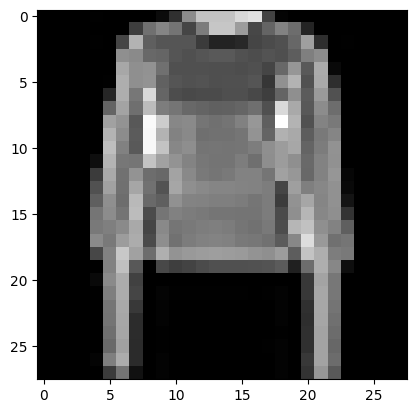

predicted_class:  ['Pullover']
target_class:  ['Pullover']


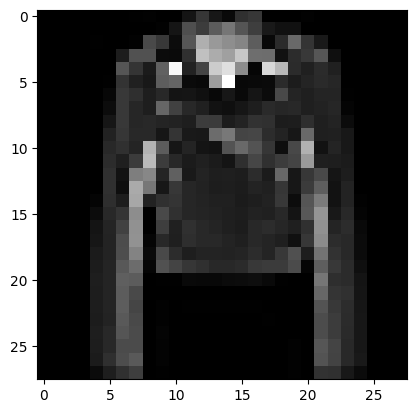

predicted_class:  ['Coat']
target_class:  ['Coat']


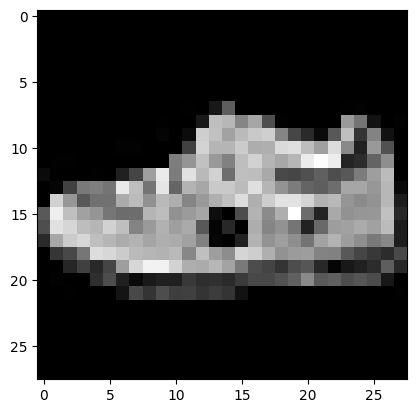

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


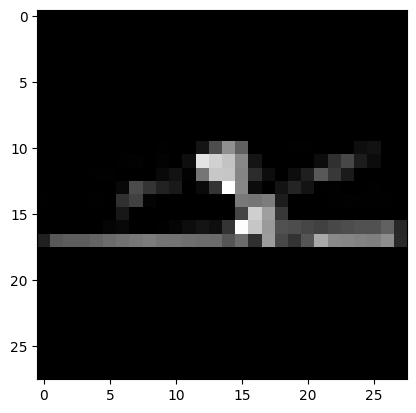

predicted_class:  ['Sandal']
target_class:  ['Sandal']


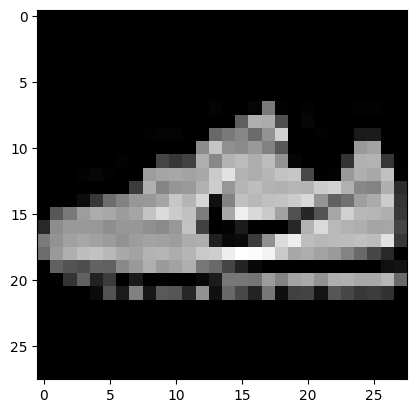

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


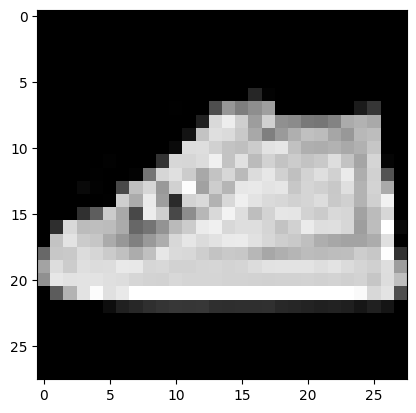

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


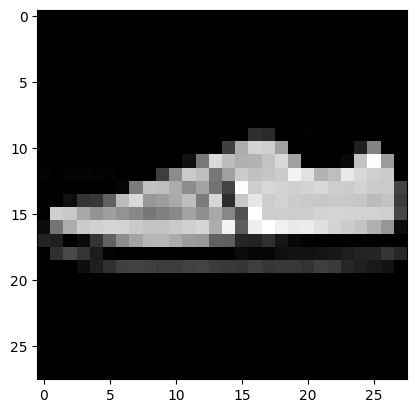

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


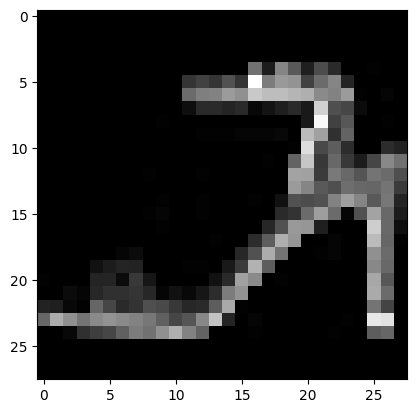

predicted_class:  ['Sandal']
target_class:  ['Sandal']


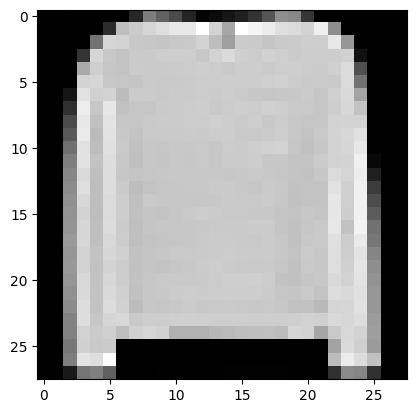

predicted_class:  ['Pullover']
target_class:  ['Pullover']


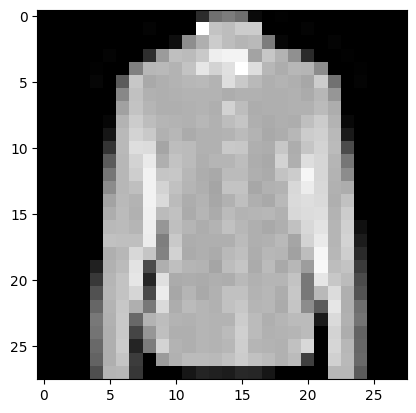

predicted_class:  ['Shirt']
target_class:  ['Shirt']


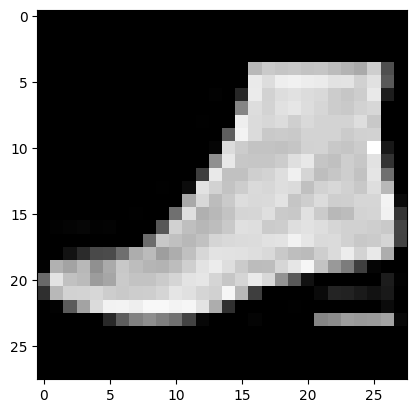

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


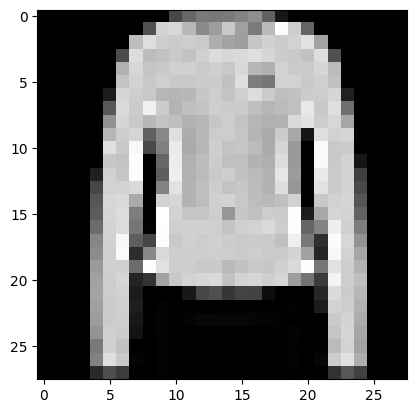

predicted_class:  ['Coat']
target_class:  ['Coat']


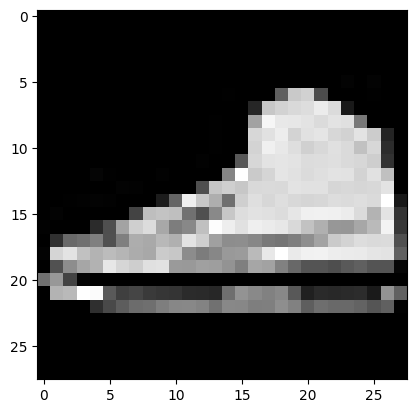

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


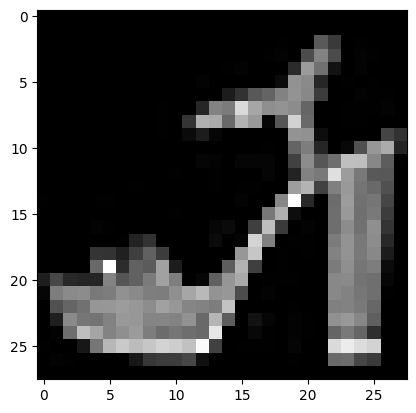

predicted_class:  ['Sandal']
target_class:  ['Sandal']


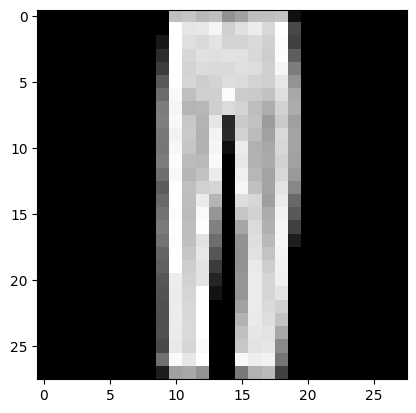

predicted_class:  ['Trouser']
target_class:  ['Trouser']


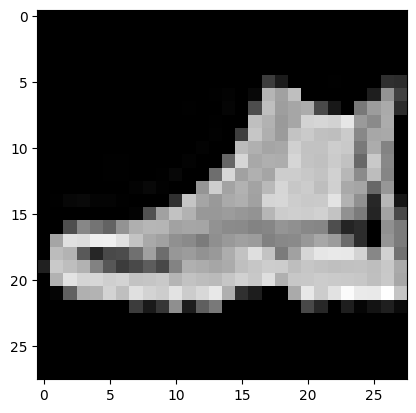

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


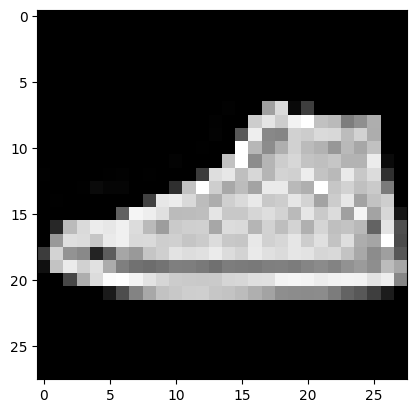

predicted_class:  ['Sneaker']
target_class:  ['Sneaker']


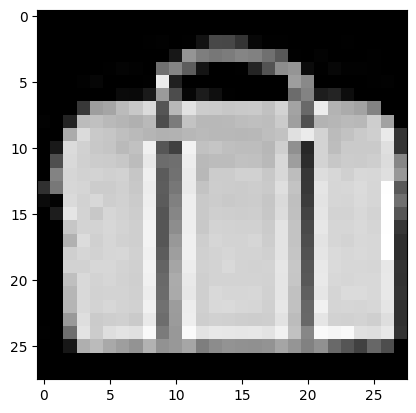

predicted_class:  ['Bag']
target_class:  ['Bag']


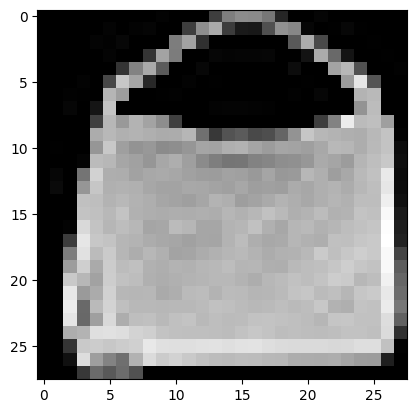

predicted_class:  ['Bag']
target_class:  ['Bag']


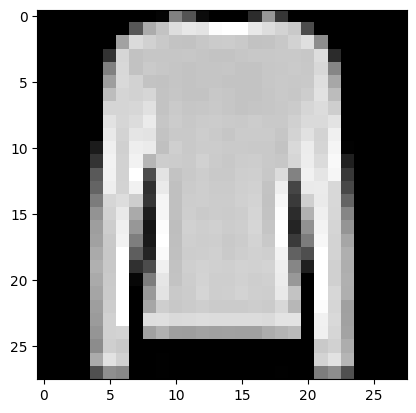

predicted_class:  ['Pullover']
target_class:  ['Pullover']


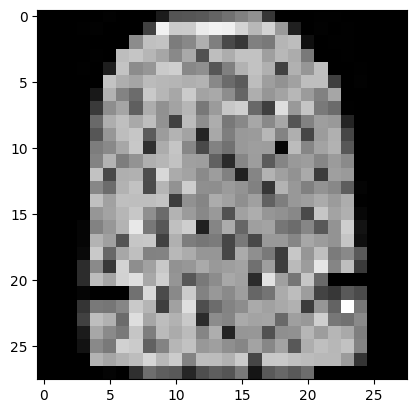

predicted_class:  ['Pullover']
target_class:  ['Coat']


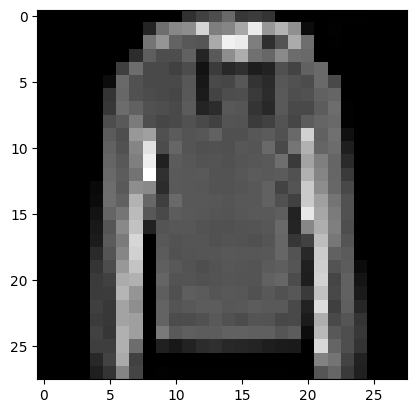

predicted_class:  ['Pullover']
target_class:  ['Pullover']


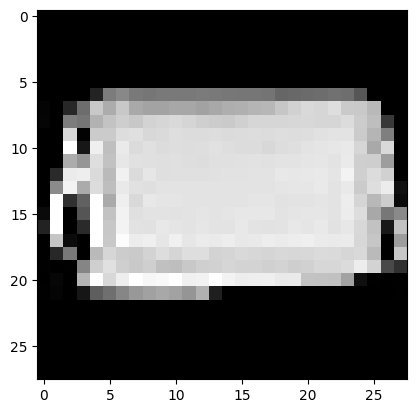

predicted_class:  ['Bag']
target_class:  ['Bag']


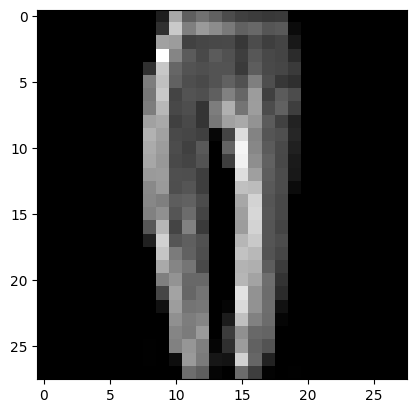

predicted_class:  ['Trouser']
target_class:  ['Trouser']


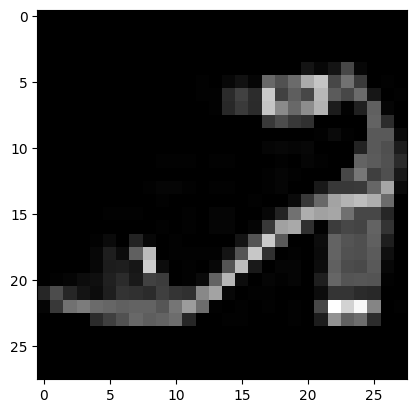

predicted_class:  ['Sandal']
target_class:  ['Sandal']


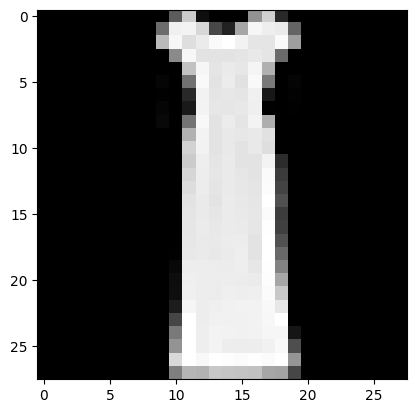

predicted_class:  ['Dress']
target_class:  ['Dress']


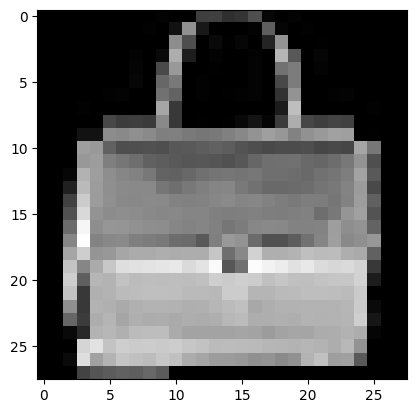

predicted_class:  ['Bag']
target_class:  ['Bag']


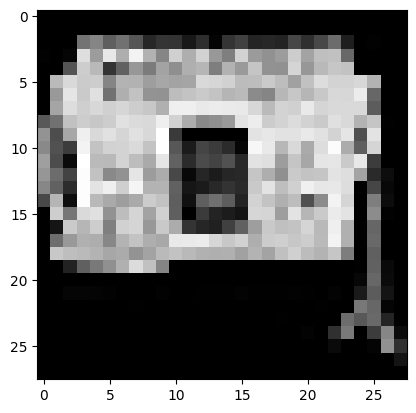

predicted_class:  ['Bag']
target_class:  ['Bag']


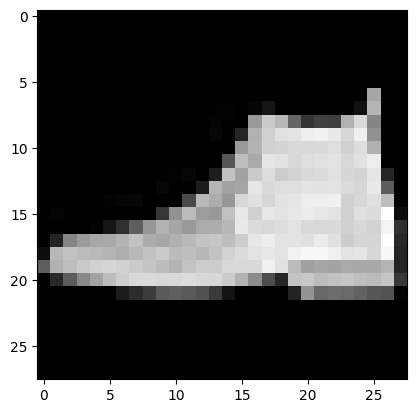

predicted_class:  ['Ankle boot']
target_class:  ['Ankle boot']


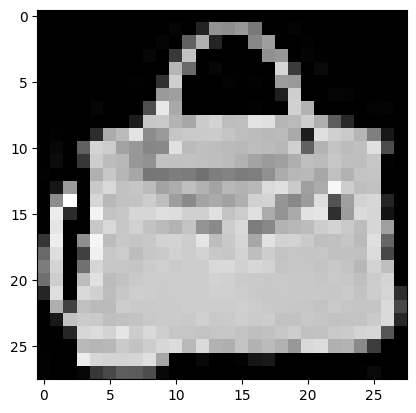

predicted_class:  ['Bag']
target_class:  ['Bag']


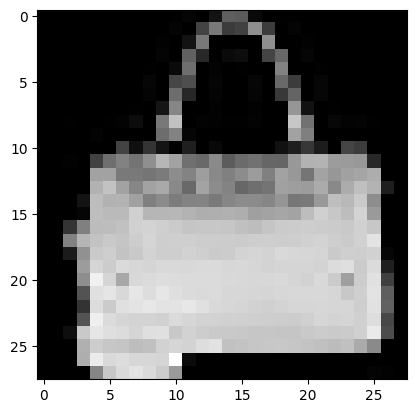

predicted_class:  ['Bag']
target_class:  ['Bag']


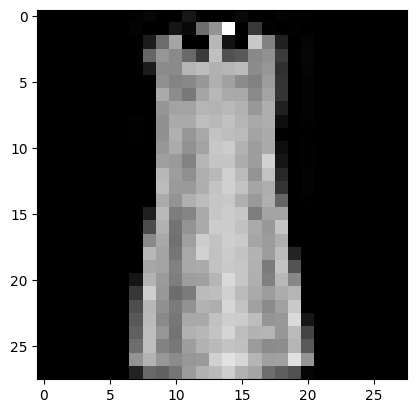

predicted_class:  ['Dress']
target_class:  ['Dress']
Test Accuracy: 90.81%


In [ ]:
  # Save model
    torch.save(model.state_dict(), "/kaggle/working/fashion_mnist_model.pth")